# **Hack the Markets Individual Challenge (Femhack 2022)**
#### **Category**: Data Science
#### **Author**: Miruna Andreea Gheata
#### **Date**: 22/01/2022

***

# **Table of contents**

[1. Introduction to the challenge](#intro)   

[2. Getting a feel of the data](#data-feel)
   
[3. Dealing with missing values](#missing-values)
   
[4. Distribution analysis](#dist)
    
   - [4.1. Processing the noise in the data](#noise)
   
[5. Outlier analysis](#outliers)
   
[6. Correlation](#corr)
   
[7. Visualization](#visu)

***

# **1. Introduction to the challenge**<a class="anchor" id="intro"></a>

The challenge definition can be found @[Nuwe](https://nuwe.io/challenge/hack-the-markets-eda).

<img src="img/femhack.jpeg">

## **1.1. Background**
Christine Lagarde is the president of the European Central Bank and was the managing director of the International Monetary Fund. After Brexit, the European Central Bank feared the implications that this separation could have for the European financial industry, that is why to improve their future decision making they have decided to create a system that allows them to estimate the valuation of the European currency with that of the Pound Sterling going forward. For this reason, the European Central Bank needs you.

## **1.2. Dataset**
A dataset of historical information on the EURO-LIBRA pair is provided. A currency pair is the dyadic quotation of the relative value of a currency unit against the unit of another currency in the foreign exchange market. For example: EURGBP = 0,9 means that 1 EURO has a value of 0,9 GBP. Historical prices in the dataset goes from January 3rd 2000 to Octobre 29th 2019. The information is given on a weekly timeframe, i.e. each row of the dataset corresponds to 1 week. The dataset contains **8 predictor variables**. The predictive variables of the dataset are:

```Open```: Price of the pair at the beginning of the day.

```High```: Maximum price that the pair reaches during the week.

```Low```: Minimum price that the pair reaches during the week.

```Close```: Price of the pair at the end of the week.

```rsi```: Relative Strength Index, is an indicator that is often used in technical analysis and shows the strength of the price.

```ema_fast```: Exponential Moving Average taking the average value of 14 weeks.

```ema_slow```: Exponential Moving Average taking the average value of 42 weeks.

The moving averages are usually used to detect trends in the markets, when the fast moving average (```ema_fast```) exceeds the slow moving average (```ema_slow```) indicates the beginning of an uptrend.

```volatility```: Volatility is a measure of the intensity of changes in the price of an asset. In this case the volatility has been obtained from the NATR (Normalized Average True Range).


## **1.3. Tasks**

1. Do an exploratory data analysis of the dataset.
2. Create a presentation (MAX 5 slides) showing the insights of the data with graphical representations and storytelling.

You can add any information from news of whatever source you want for your presentation in order to make it easily understandable.

***

# **2. Getting a feel of the data**<a class="anchor" id="data-feel"></a>

**Exploratory Data Analysis**, or EDA, is the process of analyzing data in order to fully understand it before using it for other tasks. The analysis that needs to be done has to be a thorough one, as the given data will be used further in the "developing pipeline". Some things that happen after applying EDA are:

1. Any atypical information should be detected and dealt with.
2. The distribution and different values of the data should be understood.
3. The relationships in the data have been identified and, if necessary, modified according to the necessities (i.e. drop variables that have a high correlation). 

### *2.0.1 Library imports*

In [1]:
import pandas as pd
import numpy as np

### *2.0.2. Functions definitions*

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
def na_count(df):
    '''
    Counts the total number of null records of each column in the df.
    :param df: dataframe to examine. 
    '''
    print('Feature   Number of NaN')
    print(df.isnull().sum().sort_values(ascending=True))#.loc[lambda x : x!=0])

First of all, the data is loaded. The different columns have been explained in the Introduction section. 

In [3]:
data = pd.read_csv("data_individual_challenge.csv", sep=";")
print(f"The dataset contains {len(data)} weeks of data. There are {data.shape[1]} features available.\n")
pd.set_option('display.max_columns', len(data.columns)) # To view all columns
pd.set_option('display.max_rows', 50)
data.head(3)

The dataset contains 1035 weeks of data. There are 9 features available.



,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.6281,633.0000,0.6235,0.6272,NaN,NaN,NaN,NaN
1,2000-01-10,0.6271,629.0000,0.6181,0.6197,NaN,NaN,NaN,NaN
2,2000-01-17,0.6200,0.6225,0.6072,609.0000,NaN,NaN,NaN,NaN


We can already see that there are some missing records for some features in the data (```rsi```, ```ema_fast```, ```ema_slow``` and ```volatility```). Let's check some more rows and see if the next ones have any value. 

In [4]:
data.head(20)

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.6281,633.00000,0.6235,0.6272,NaN,NaN,NaN,NaN
1,2000-01-10,0.6271,629.00000,0.6181,0.6197,NaN,NaN,NaN,NaN
2,2000-01-17,0.6200,0.62250,0.6072,609.0000,NaN,NaN,NaN,NaN
3,2000-01-24,0.6091,0.61271,599.0000,0.6027,NaN,NaN,NaN,NaN
4,2000-01-31,0.6021,0.62670,598.0000,0.6158,NaN,NaN,NaN,NaN
5,2000-02-07,0.6166,0.62090,0.6102,0.6192,NaN,NaN,NaN,NaN
6,2000-02-14,0.6192,0.62320,0.6117,0.6157,NaN,NaN,NaN,NaN
7,2000-02-21,0.6161,0.62650,0.6100,0.6114,NaN,NaN,NaN,NaN
8,2000-02-28,0.6117,0.61740,0.5929,606.0000,NaN,NaN,NaN,NaN
9,2000-03-06,0.6059,0.61320,602.0000,0.6102,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1035 non-null   object 
 1   Open        1035 non-null   float64
 2   High        1035 non-null   float64
 3   Low         1035 non-null   float64
 4   Close       1035 non-null   float64
 5   rsi         1021 non-null   float64
 6   ema_fast    1022 non-null   float64
 7   ema_slow    994 non-null    float64
 8   volatility  1021 non-null   float64
dtypes: float64(8), object(1)
memory usage: 72.9+ KB


The data appears to be lacking many values for the mentioned features.

<img src="img/nan.jpeg">

***

# **3. Dealing with missing values**<a class="anchor" id="missing-values"></a>

When dealing with missing values, there are different approaches to use: delete the rows, replace the ```NaN``` with computed values (i.e. such as the mean), etc. Let's see how many values we are missing for each feature. 

In [6]:
na_count(data)

Feature   Number of NaN
Date           0
Open           0
High           0
Low            0
Close          0
ema_fast      13
rsi           14
volatility    14
ema_slow      41
dtype: int64


Let's select all the rows in the data that contain ```NaN``` values. 

In [7]:
data_na = data[data.isna().any(axis=1)]
data_na

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.6281,633.00000,0.6235,0.6272,NaN,NaN,NaN,NaN
1,2000-01-10,0.6271,629.00000,0.6181,0.6197,NaN,NaN,NaN,NaN
2,2000-01-17,0.6200,0.62250,0.6072,609.0000,NaN,NaN,NaN,NaN
3,2000-01-24,0.6091,0.61271,599.0000,0.6027,NaN,NaN,NaN,NaN
4,2000-01-31,0.6021,0.62670,598.0000,0.6158,NaN,NaN,NaN,NaN
5,2000-02-07,0.6166,0.62090,0.6102,0.6192,NaN,NaN,NaN,NaN
6,2000-02-14,0.6192,0.62320,0.6117,0.6157,NaN,NaN,NaN,NaN
7,2000-02-21,0.6161,0.62650,0.6100,0.6114,NaN,NaN,NaN,NaN
8,2000-02-28,0.6117,0.61740,0.5929,606.0000,NaN,NaN,NaN,NaN
9,2000-03-06,0.6059,0.61320,602.0000,0.6102,NaN,NaN,NaN,NaN


In [8]:
print(f"The dataset contains {len(data_na)} weeks of missing data ({round(len(data_na) * 100 / len(data), 3)}% of the data).\n")

The dataset contains 41 weeks of missing data (3.961% of the data).



Taking into account that there is less than $4\%$ of the data missing, and that the rows affected are from the beggining of the data (year 2000), we will delete the rows where the values are missing.

In [9]:
data = data.dropna()

Let's check that we have indeed deleted the ```NaN``` values. 

In [10]:
na_count(data)

Feature   Number of NaN
Date          0
Open          0
High          0
Low           0
Close         0
rsi           0
ema_fast      0
ema_slow      0
volatility    0
dtype: int64


Perfect! Onto the next part of our EDA :)

***

# **4. Distribution Analysis**<a class="anchor" id="dist"></a> 

This next section is all about understanding the type of data we are dealing with (besides the obvious ```Date``` feature). Statistically speaking, all data follows a certain distribution: it has a **mean** and a **standard deviation**. A big step in EDA is checking and understanding this distribution; it is important because after we understand it, we will be able to detect the *anomalies* in the data, called **outliers**. Outliers are values that do not quite fit with the other values in the distribution, either because they correspond to noise in the data (corrupt data) or because of unusual behaviour. In the case of stock market, these outliers are more likely to be unusual behaviours created by external factors, such as scandals, bankruptcy, wars, "hyped buyers/sellers"... 

### *4.0.1 Library imports*

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

### *4.0.2 Function definitions*

In [12]:
def get_bounds(data):
    '''
    Computes the Inter-Quartile Range (IQR)'s lower and upper bound for the given data. 
    Source: https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414
    :param data: list of values to evaluate. 
    :return: the lower and upper range of IQR.
    '''
    sorted(data)
    # Compute the First and Third Quartile
    Q1,Q3 = np.percentile(data , [25,75])
    # Find Inter-Quartile Range
    IQR = Q3 - Q1
    # Compute the lower and upper ranges
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [13]:
def dist_shape(data):
    '''
    Shows the skewness and the kurtosis in the distribution of the given data. 
    :param data: data sample to analyze.
    '''
    # Only use the numerical columns of the dataframe. 
    for feature in data.select_dtypes(include=[np.float64]):
        print(f"For feature {feature}: ")
        print(f"    Skewness: {data[feature].skew()}") # pandas
        print(f"    Kurtosis: {data[feature].kurt()}\n\n") # pandas
        
def boxplot(data, bounds=False):
    '''
    Plots the boxplot of the given data.
    :param data: data sample to analyze. 
    :param bounds: boolean used to show the upper and lower bounds of the Inter-Quartile Range (IQR). Default to False.
    '''
    # Only use the numerical columns of the dataframe. 
    for feature in data.select_dtypes(include=[np.float64]):
        # Set the plot dimensions
        fig, ax = plt.subplots(figsize=(30, 10))
        trans = ax.get_xaxis_transform()
        sns.set(color_codes=True)
        # Plot the boxplot
        sns.boxplot(x = data[feature])
        lower, upper = get_bounds(data[feature])
        # If user wants bounds, draw a vertical line for each of the bounds
        if bounds:
            plt.axvline(lower, 0, 1, color = "r", label="Lower bound")
            plt.axvline(upper, 0, 1, color = "g", label="Upper bound")
            plt.legend()
        # Show the plot
        plt.savefig(f'img/figs/boxplot_{feature}.png')
        plt.show()
        
def kdeplot(data):
    '''
    Plots the kernel density estimate (KDE) plot of the given data. Method for visualizing the distribution of observations in a dataset, analagous to a histogram. 
    :param data: data sample to analyze. 
    '''
    # Only use the numerical columns of the dataframe.     
    for feature in data.select_dtypes(include=[np.float64]):
        fig, ax = plt.subplots(figsize=(30, 10))
        sns.set(color_codes=True)
        # Plot kernel density estimate plot
        sns.kdeplot(data[feature], shade=True)
        # Draw a vertical line for the mean and the median of the data. 
        plt.axvline(data[feature].mean(), 0, 1, label="Mean")
        plt.axvline(data[feature].median(), 0, 1, label="Median", color='r')
        plt.legend()
        # Show the plot
        plt.savefig(f'img/figs/kdeplot_{feature}.png')
        plt.show()


In [14]:
def remove_max(data):
    '''
    Data processing function used to correct the outliers found in the numerical columns of the dataset. 
    More precisely, it divides by 1000 all those values that are bigger than 5. 
    :param data: stock data information. 
    '''
    # The only features that we can process are the "raw" ones. 
    for feature in ["Open", "High", "Low", "Close"]:
        data[feature] = np.where(data[feature] < 5, data[feature], data[feature]/1000)

The best way to get a quick look at the distribution information of the data is by using this function: 

In [15]:
data.describe()

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,55.178123,61.596856,76.445936,59.921244,51.432470,0.771402,0.767578,2.141888
std,194.658349,209.322209,228.192042,205.965101,10.279223,0.095062,0.093424,1.497803
min,0.578300,0.587600,0.006600,0.578400,19.171099,0.598982,0.607234,1.006340
25%,0.686700,0.692550,0.682050,0.686725,44.506477,0.682408,0.682325,1.454325
50%,0.808875,0.810005,0.807485,0.806100,50.783937,0.791200,0.783807,1.809152
75%,0.875725,0.882448,0.870575,0.875100,57.851999,0.860613,0.856121,2.209401
max,892.000000,934.000000,899.000000,921.000000,79.522395,0.903959,0.889572,17.421381


Right away we can see that there is something wrong with the values of the data. We are dealing with currency pairs between the euro and the pound, so the values should be between $[0, \mbox{some low number})$. However, the maximum values of most of the columns are extremely high (i.e. 892 for the ```Open``` feature), which subsequently affect the distribution of the data (i.e. the mean of the ```Open``` feature is 55). We are not touching the "stock" features (```rsi```, ```ema_fast```, ```ema_slow``` and ```volatility```), as we are considering that the data was collected with noise for the other columns but the "stock" features are correct.

## **4.1. Processing the noise in the data**<a class="anchor" id="noise"></a> 

Let's take a closer look at the values of the feature ```Open```, and we will sort these in an ascending manner. 

In [16]:
data["Open"].sort_values()

43       0.5783
42       0.5786
41       0.5882
46       0.5967
74       0.5968
         ...   
944    882.0000
524    882.0000
537    882.0000
601    886.0000
993    892.0000
Name: Open, Length: 994, dtype: float64

We see that the last few values printed are way over the "some low number" mentioned. There is clearly noise in the data in the form of high values, so we will have to "scale" the values before continuing with our analysis. Let's recalculate the high values and show the new distribution of the data.

In [17]:
remove_max(data)
data.describe()

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.772824,0.781474,0.765153,0.773208,51.432470,0.771402,0.767578,2.141888
std,0.095873,0.107394,0.098407,0.095810,10.279223,0.095062,0.093424,1.497803
min,0.578300,0.587600,0.006600,0.578400,19.171099,0.598982,0.607234,1.006340
25%,0.683400,0.687625,0.678325,0.683625,44.506477,0.682408,0.682325,1.454325
50%,0.791950,0.799305,0.784705,0.791950,50.783937,0.791200,0.783807,1.809152
75%,0.862047,0.869650,0.853240,0.862950,57.851999,0.860613,0.856121,2.209401
max,0.961400,2.233500,0.943800,0.961600,79.522395,0.903959,0.889572,17.421381


<img src="img/eureka.gif">

As we can see, this distribution makes much more sense. Let's look once again at the ```Open``` feature:

In [18]:
data["Open"].sort_values()

43     0.5783
42     0.5786
41     0.5882
46     0.5967
74     0.5968
        ...  
510    0.9352
481    0.9412
473    0.9471
470    0.9604
469    0.9614
Name: Open, Length: 994, dtype: float64

Now that we are confident that the distribution of the data is correct, let's visualize it better using different plots. First, the **boxplot**. Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”) ([Source](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)). With this visualization, we can also identify if there are any outliers.

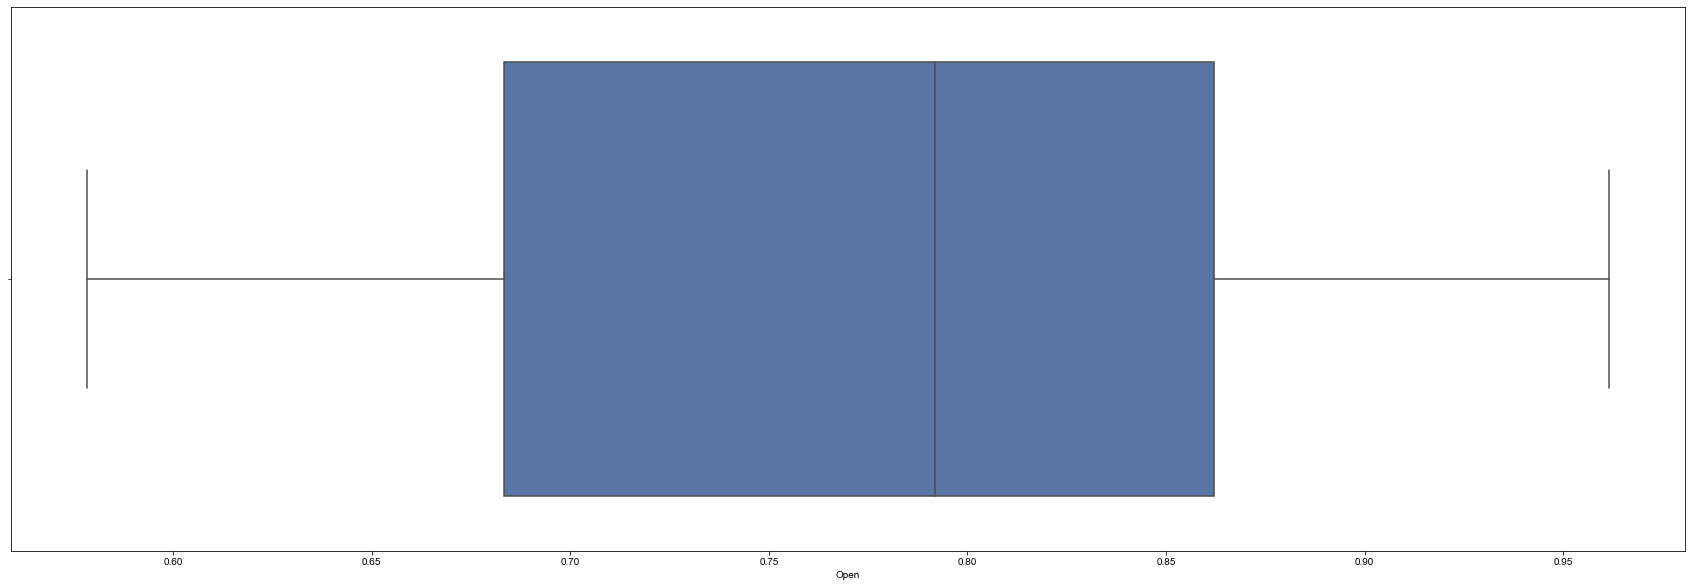

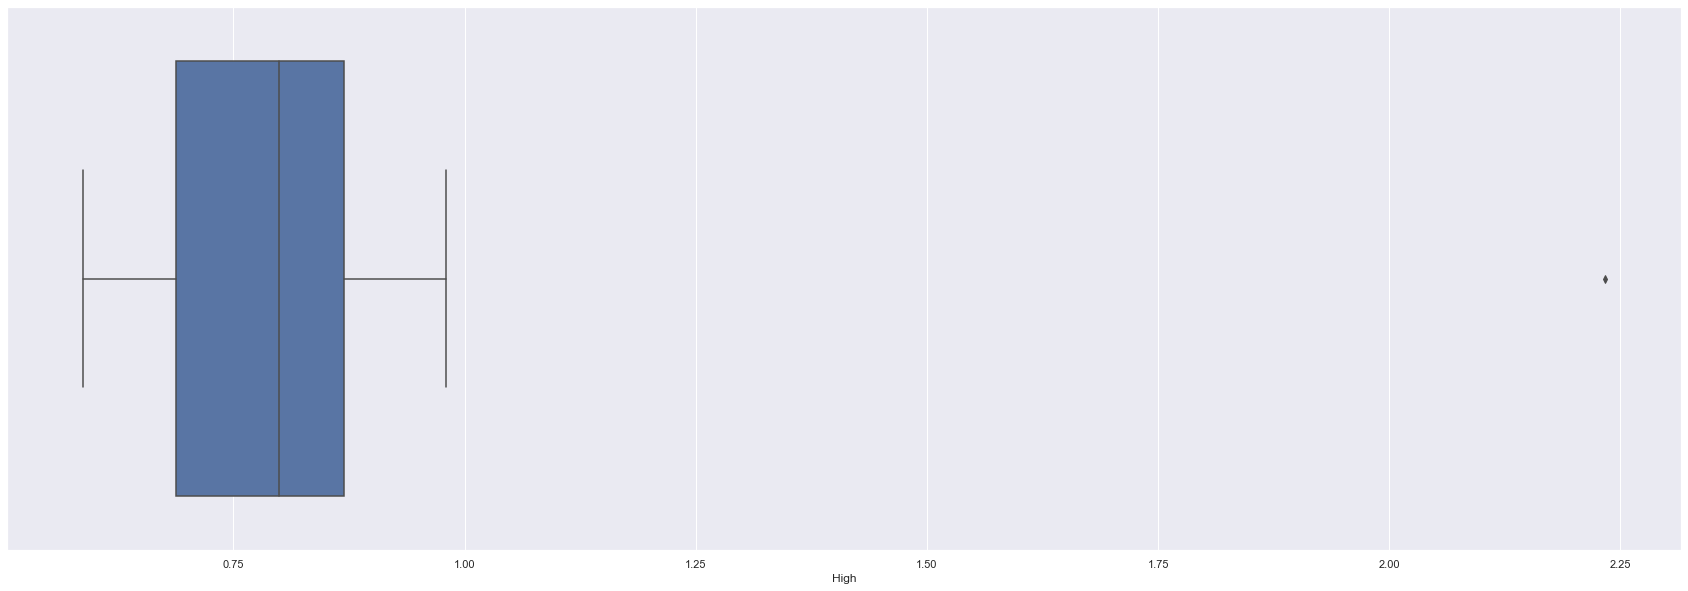

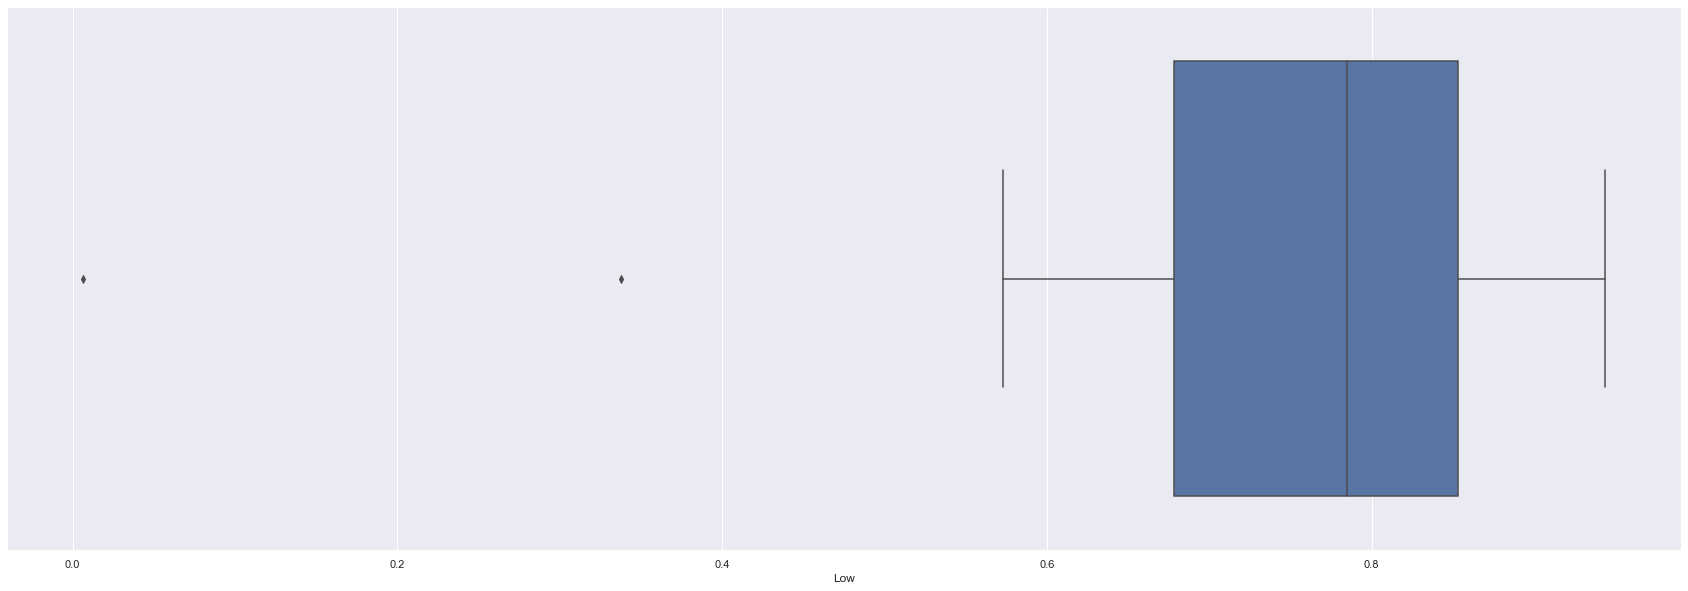

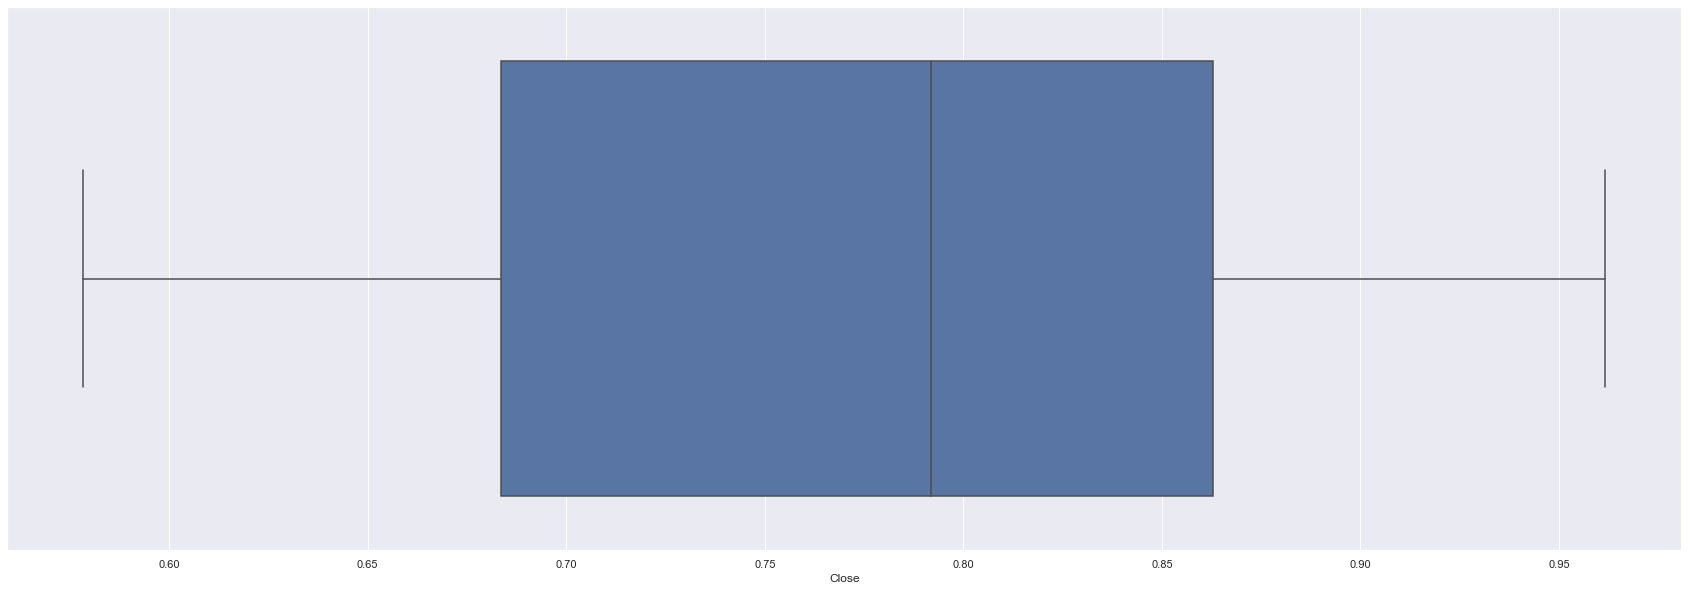

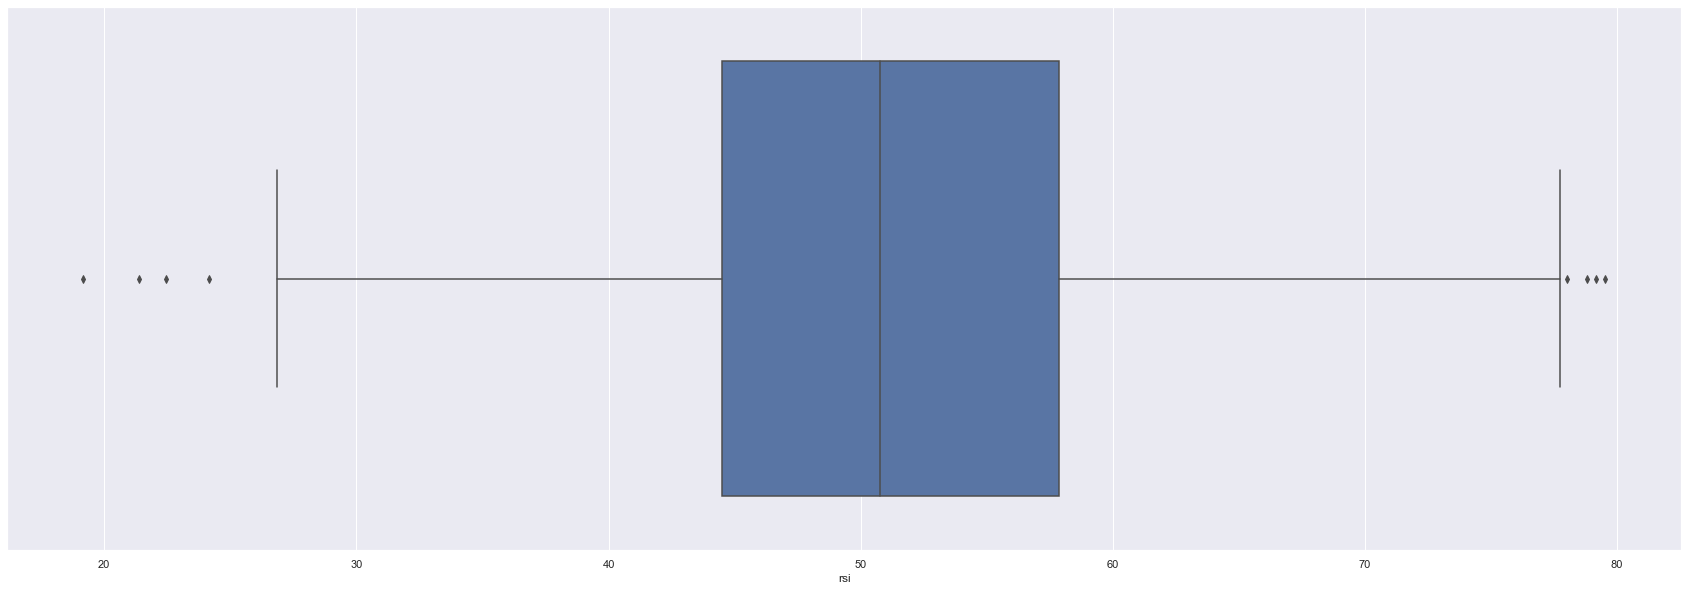

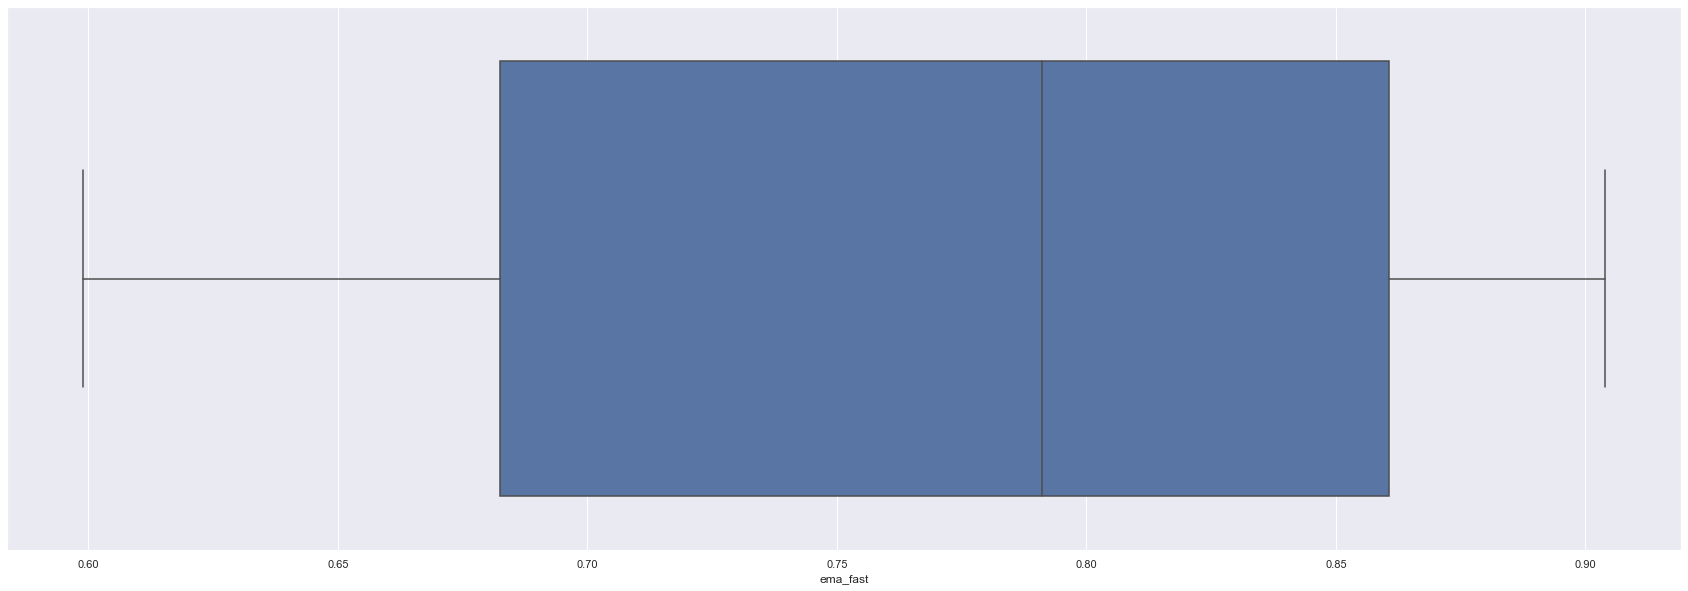

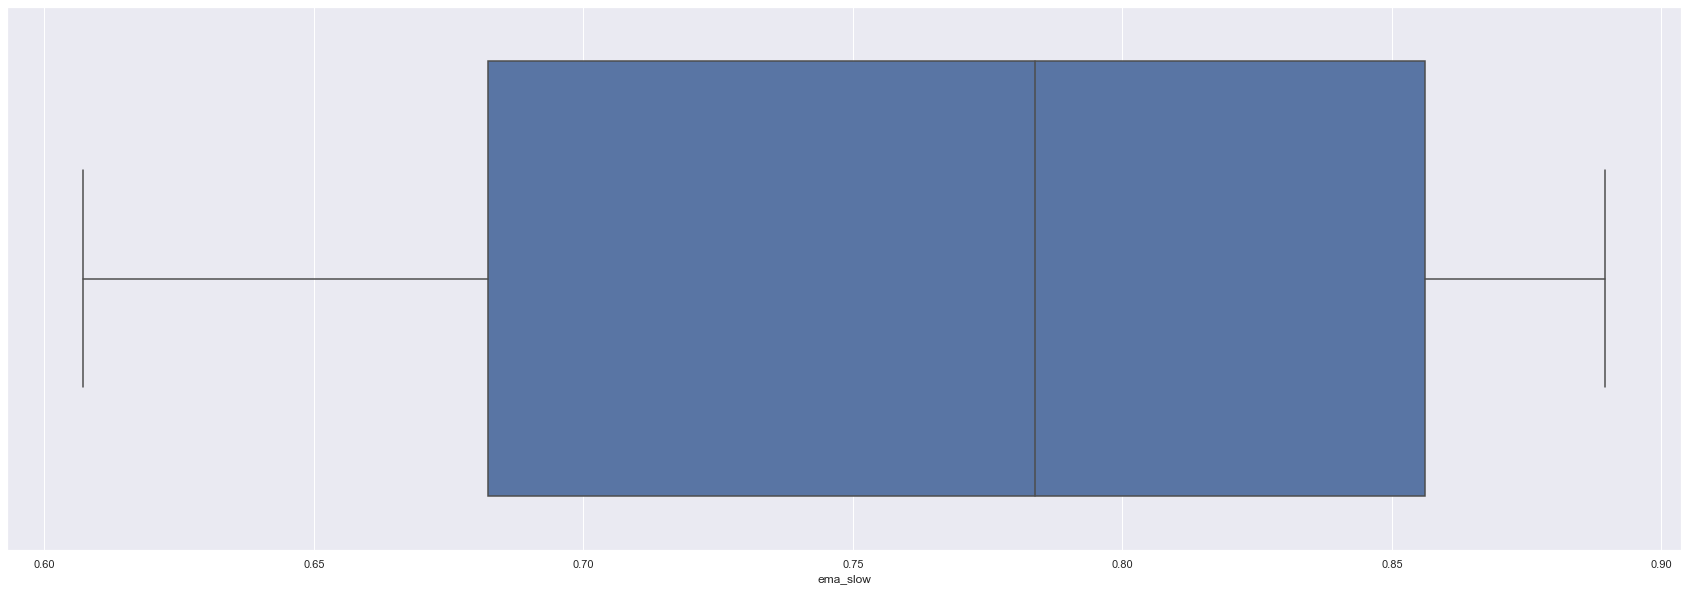

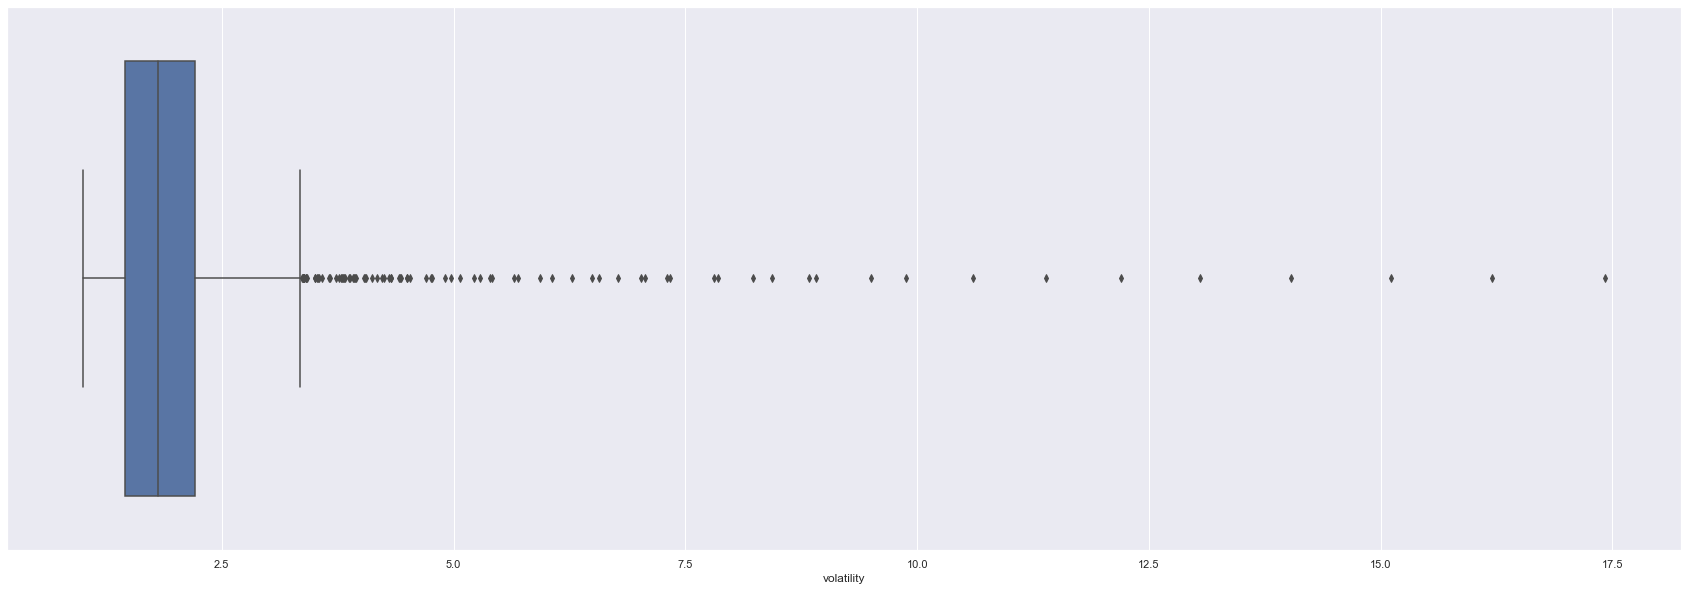

In [19]:
boxplot(data)

There are different outliers for the features ```High```, ```Low```, ```rsi``` and ```volatility```, but we will analyze them in the next section. The next kind visualization we will use is the **kernel density estimate (KDE)** plot. A KDE plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions ([Source](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)).

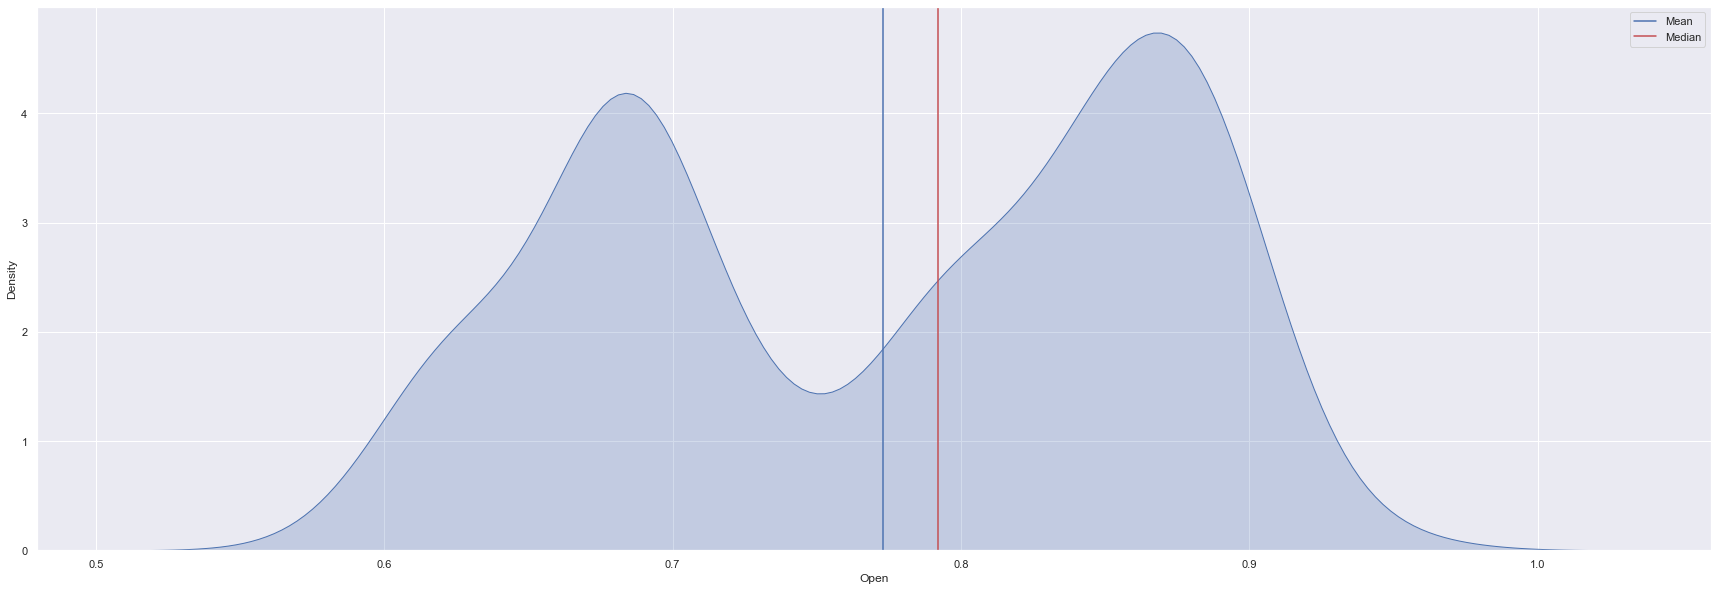

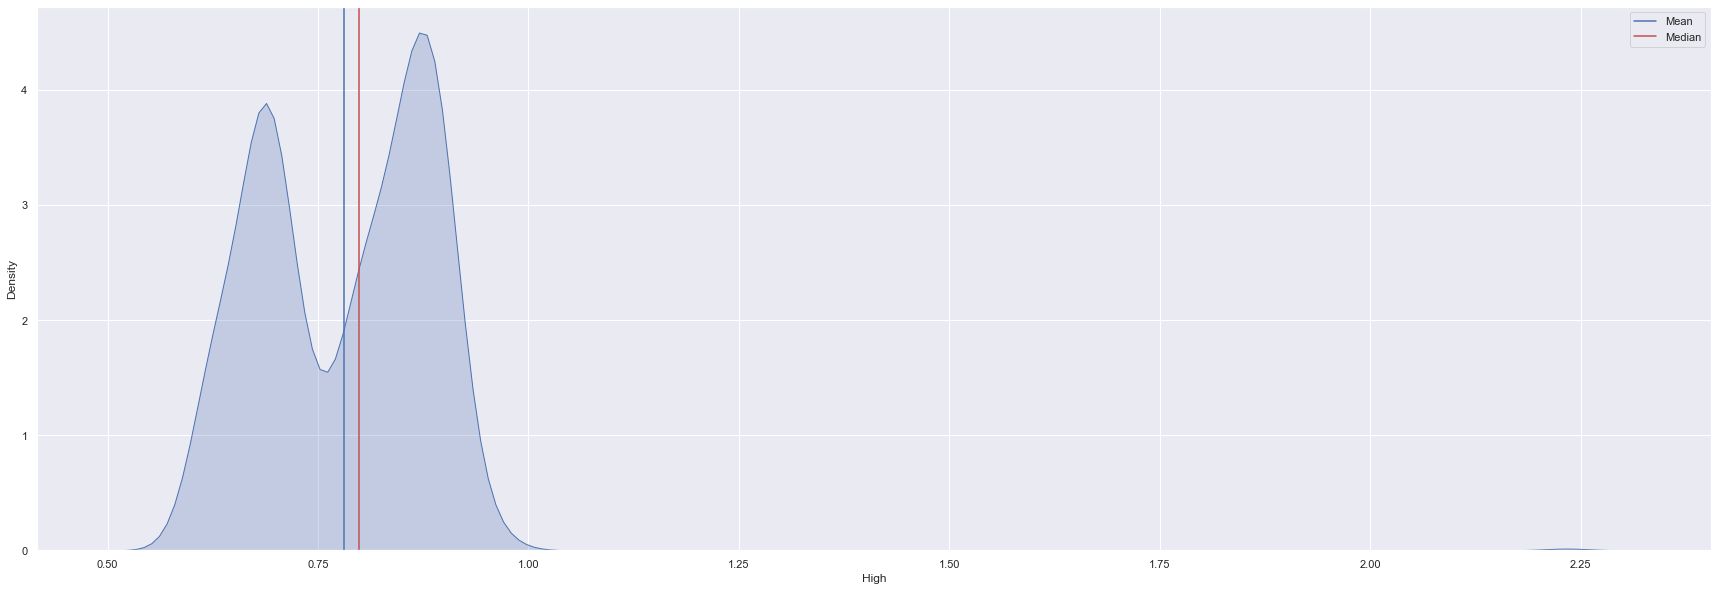

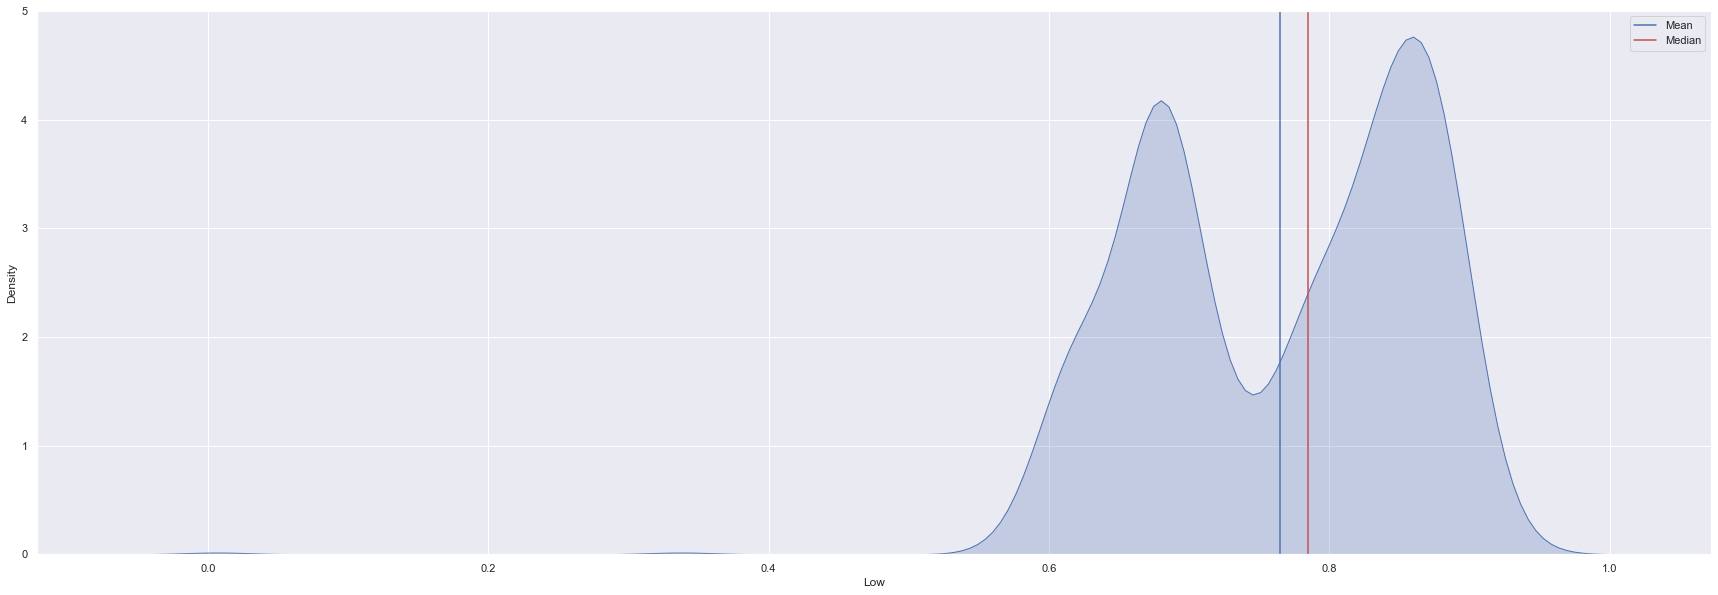

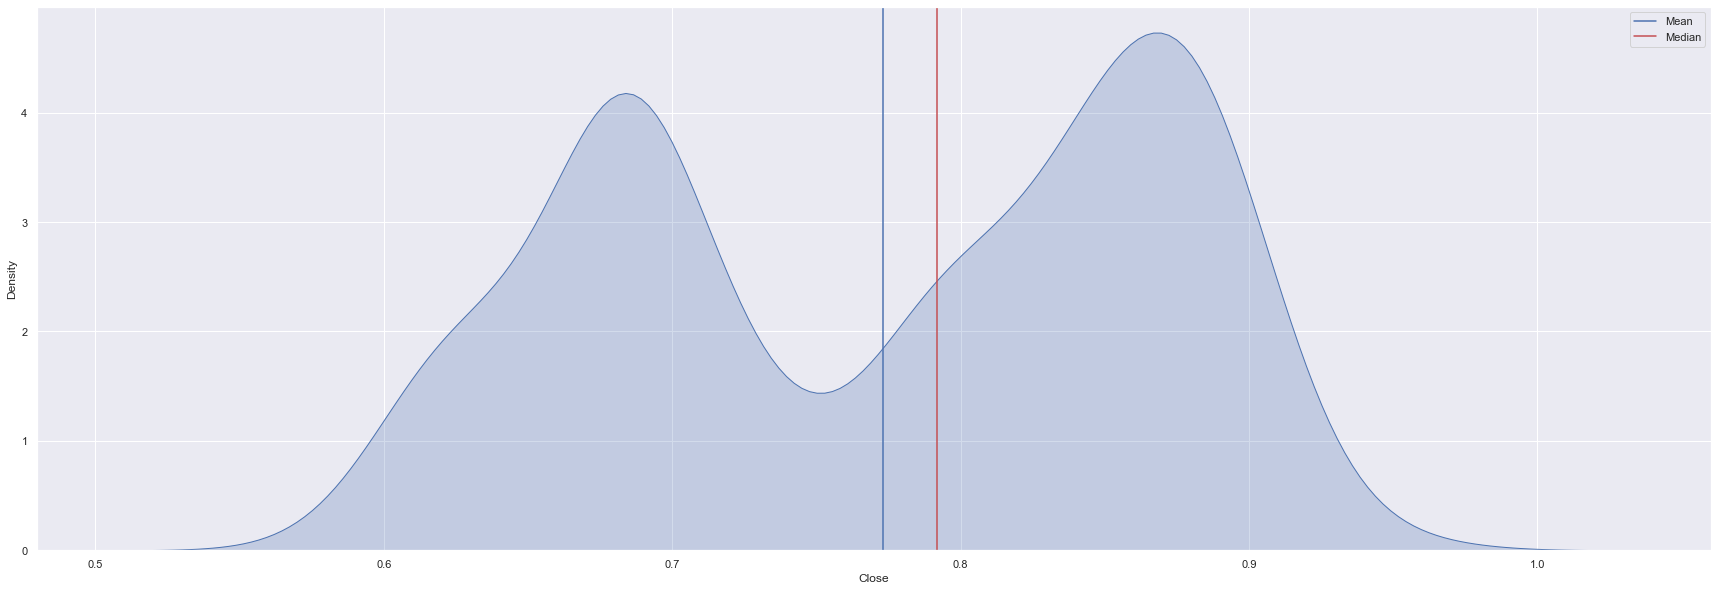

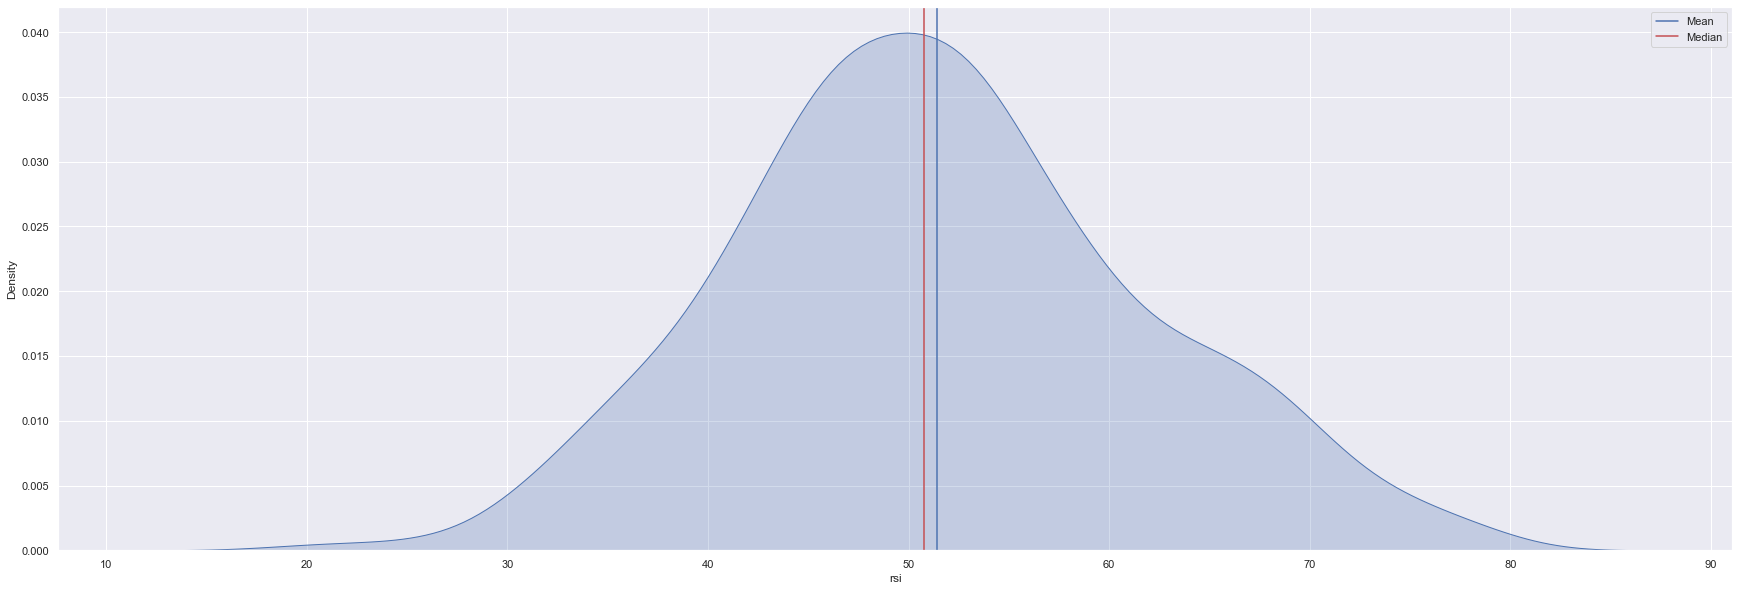

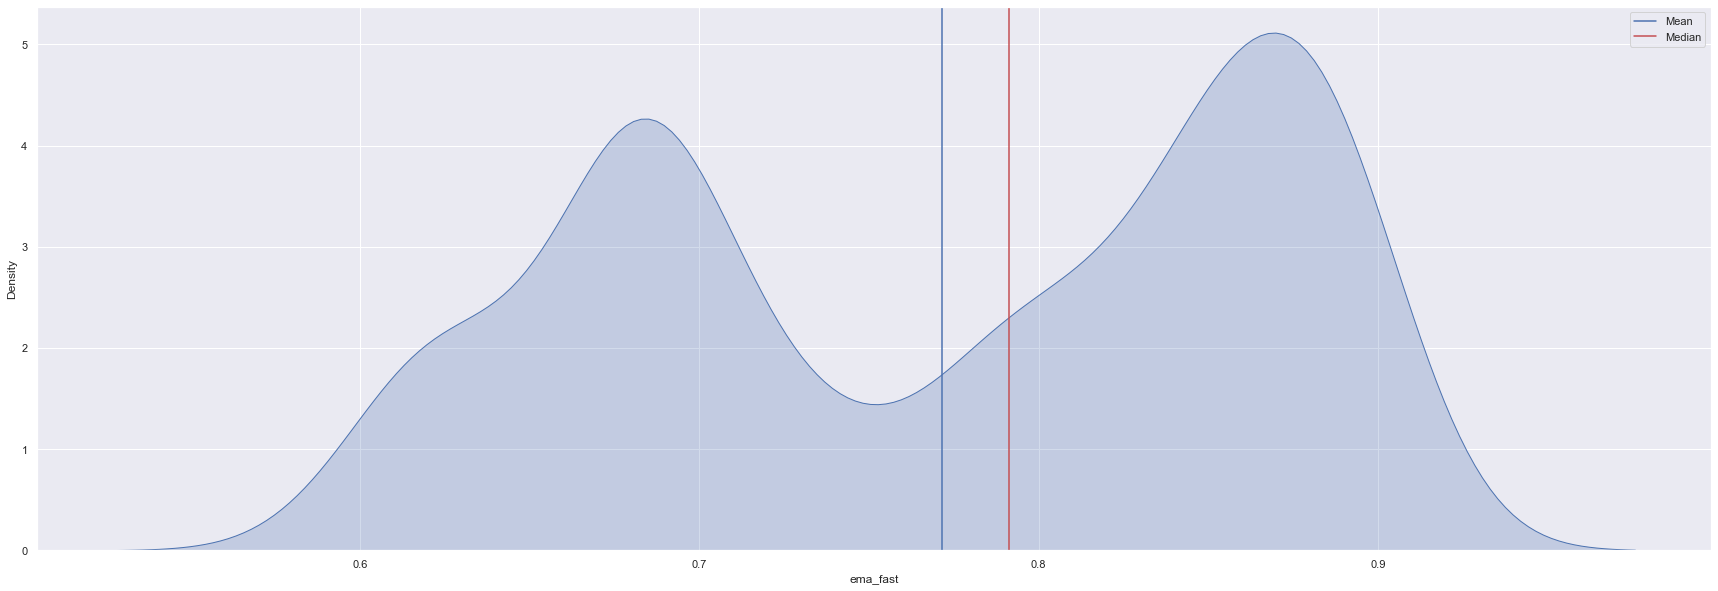

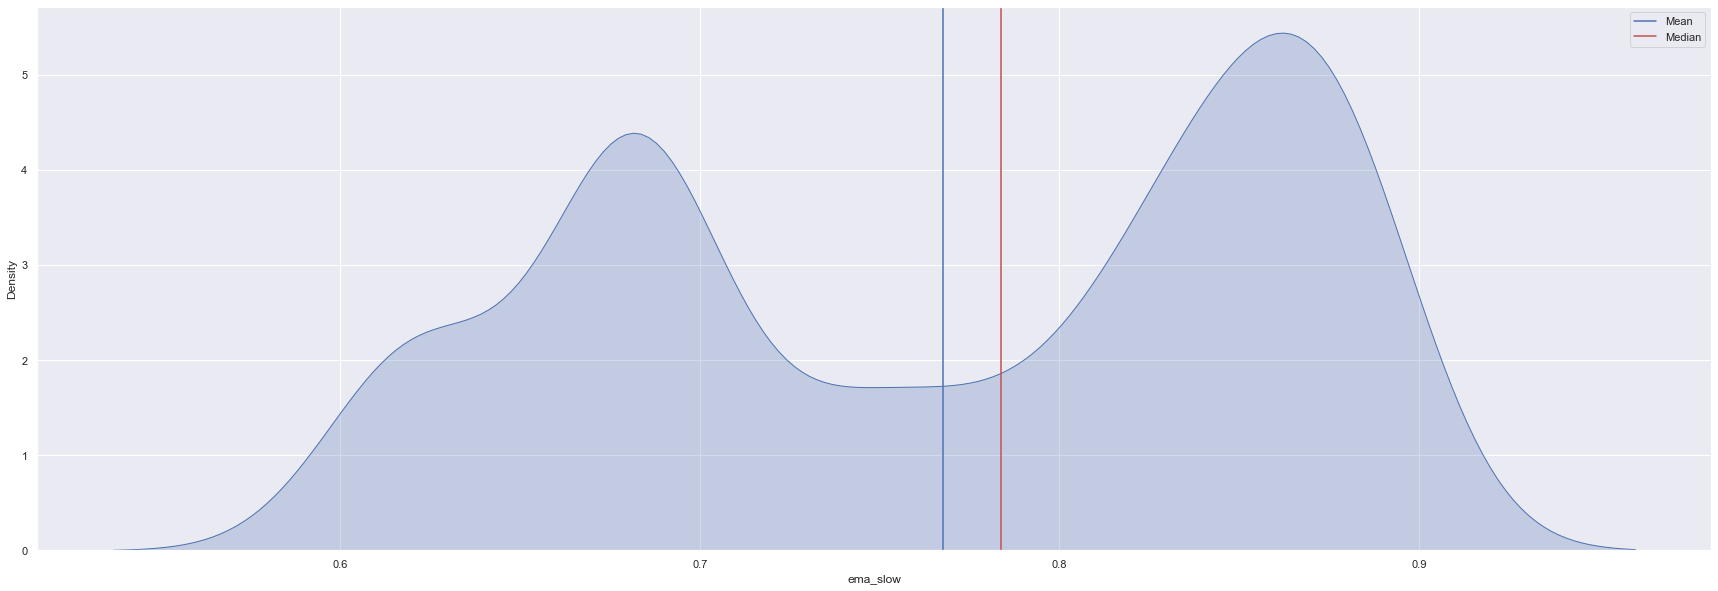

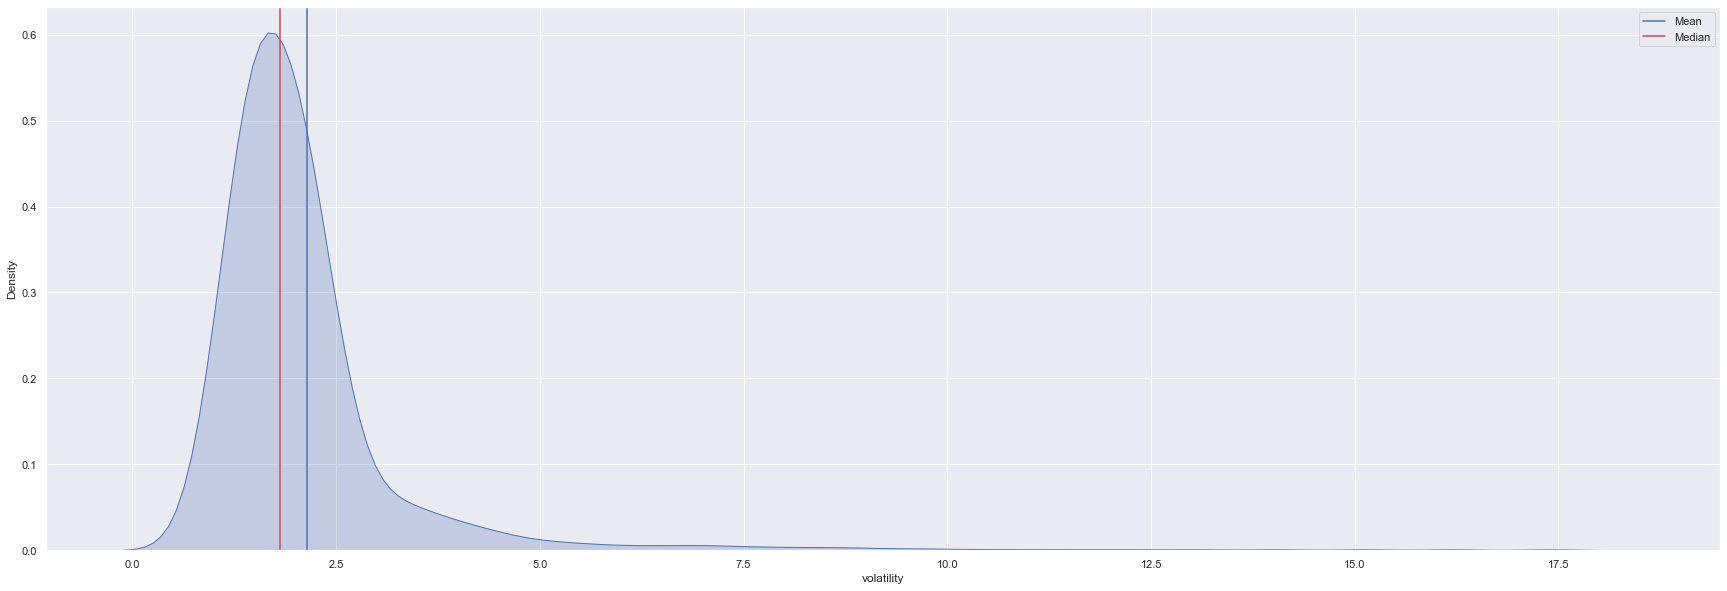

In [20]:
kdeplot(data)

There are different shapes for the distribution of each feature. Most distributions follow a **bimodal distribution** (two peaks). 

Another way of analyzing the distribution is by looking at its **skewness** and **kurtosis** values. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean ([Source](https://en.wikipedia.org/wiki/Skewness)). The kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. Like skewness, kurtosis describes the shape of a probability distribution. The only data values (observed or observable) that contribute to kurtosis in any meaningful way are those outside the region of the peak; i.e., the outliers. Therefore, kurtosis measures outliers only; it measures nothing about the "peak" ([Source](https://en.wikipedia.org/wiki/Kurtosis)).

In [21]:
dist_shape(data)

For feature Open: 
    Skewness: -0.16686491810271536
    Kurtosis: -1.4031111383954853


For feature High: 
    Skewness: 2.3417319704649557
    Kurtosis: 31.925448616166843


For feature Low: 
    Skewness: -0.6725969119628245
    Kurtosis: 2.279849628399416


For feature Close: 
    Skewness: -0.16726514640063525
    Kurtosis: -1.4052573519227112


For feature rsi: 
    Skewness: 0.17669613644387538
    Kurtosis: -0.13120883234285952


For feature ema_fast: 
    Skewness: -0.19531592880815687
    Kurtosis: -1.4672187443865463


For feature ema_slow: 
    Skewness: -0.2139855182974214
    Kurtosis: -1.4850923349138616


For feature volatility: 
    Skewness: 5.296652293506115
    Kurtosis: 37.385775185845276




In the case of the kurtosis, we can see that the features that have outliers have a higher coefficient that the features with no outliers. 

***

# **5. Outlier analysis**<a class="anchor" id="outliers"></a>

Now, let's look further into the outliers and determine their meaning if possible. Since we have agreed that the stock outliers are not actually incorrect data, but rather data triggered by external factors, it will be interesting to see if there are any important events that could have caused the values of the outliers. 

### *5.0.1 Function definitions*

In [22]:
def get_outliers(data, feature):
    '''
    Using the lower and upper bounds of the IQR, it returns all the outlier values found in the dataframe feature (or column). 
    :param data: dataframe containing the data to analyze. 
    :param feature: feature we want to analyze from the dataframe. 
    :return: dataframe rows containing the outliers of the given feature.
    '''
    # Compute the lower and upper bounds of IQR
    lower, upper = get_bounds(data[feature])
    # Return all those records that are outside the lower and upper bound.
    return data[(data[feature] < lower) | (data[feature] > upper)]

Let's plot the boxplots again but in this case showing the lower and upper bounds of the IRQ. 

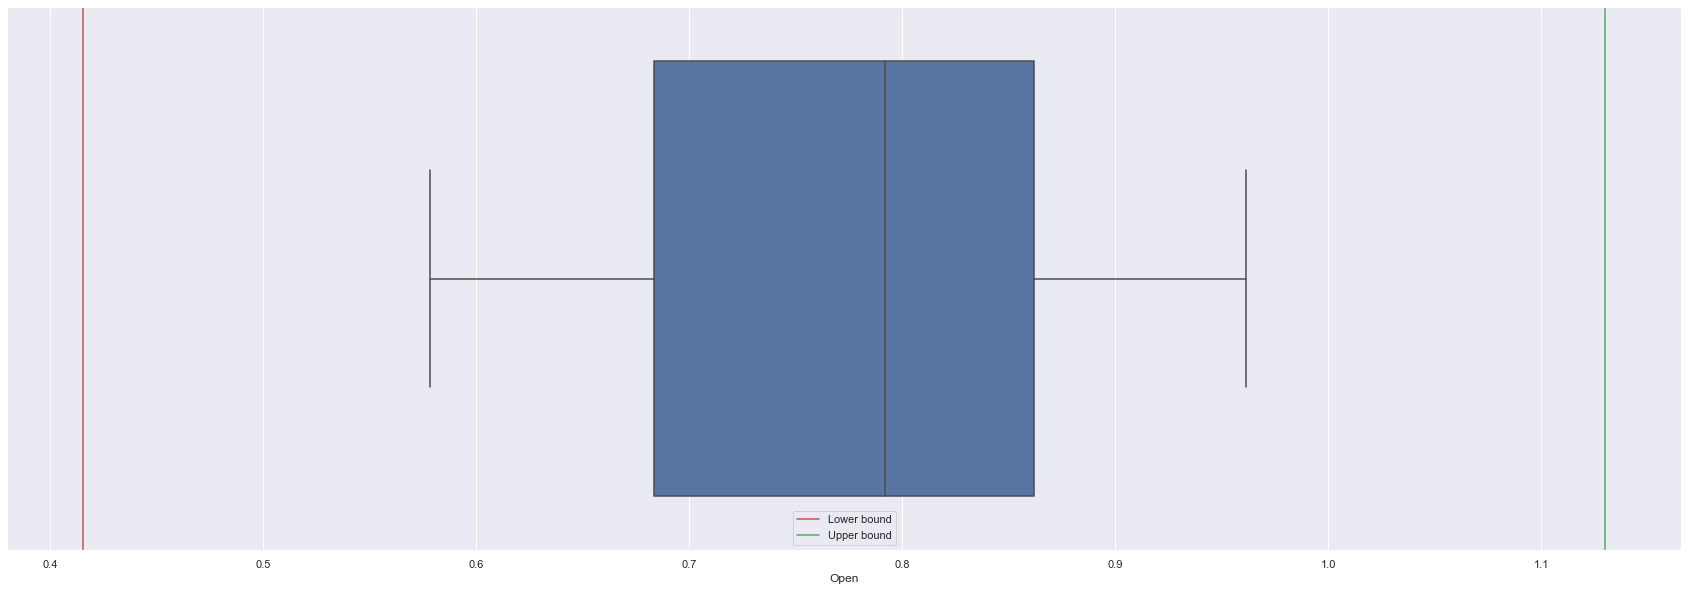

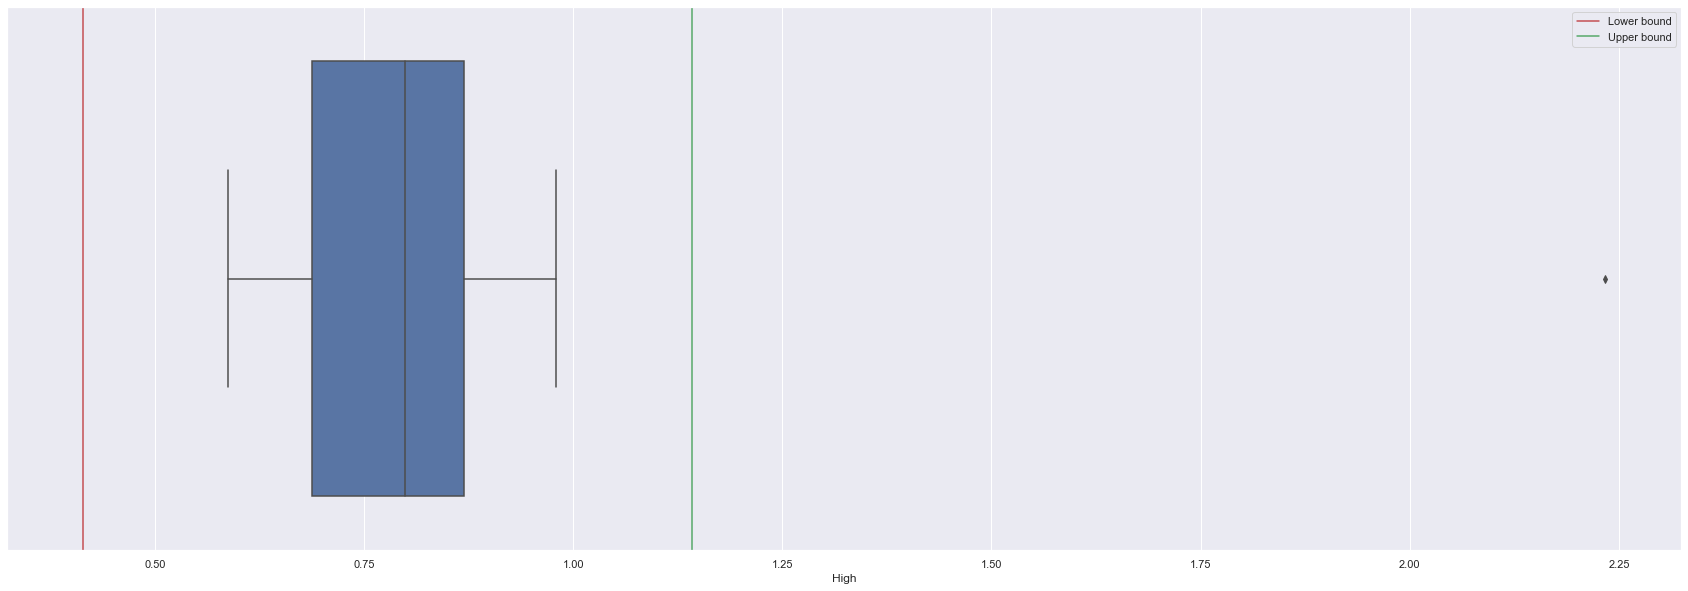

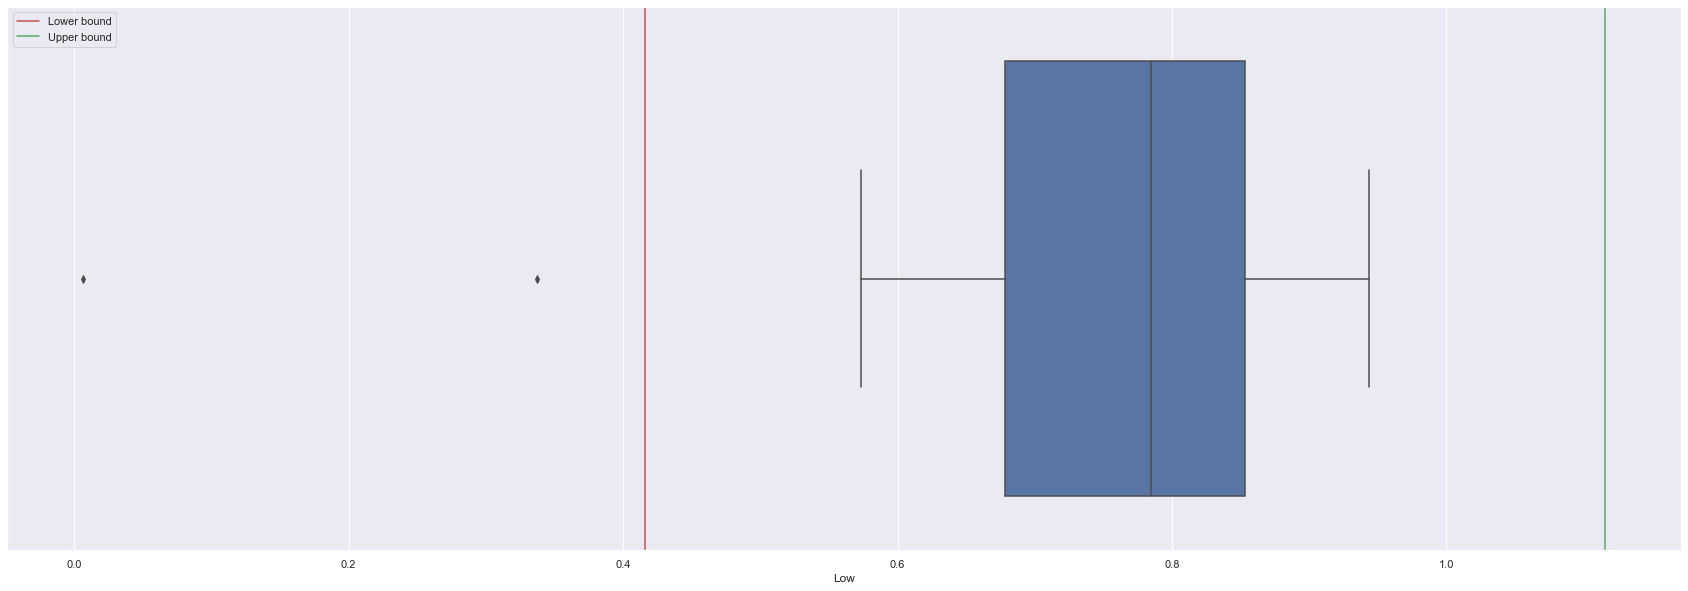

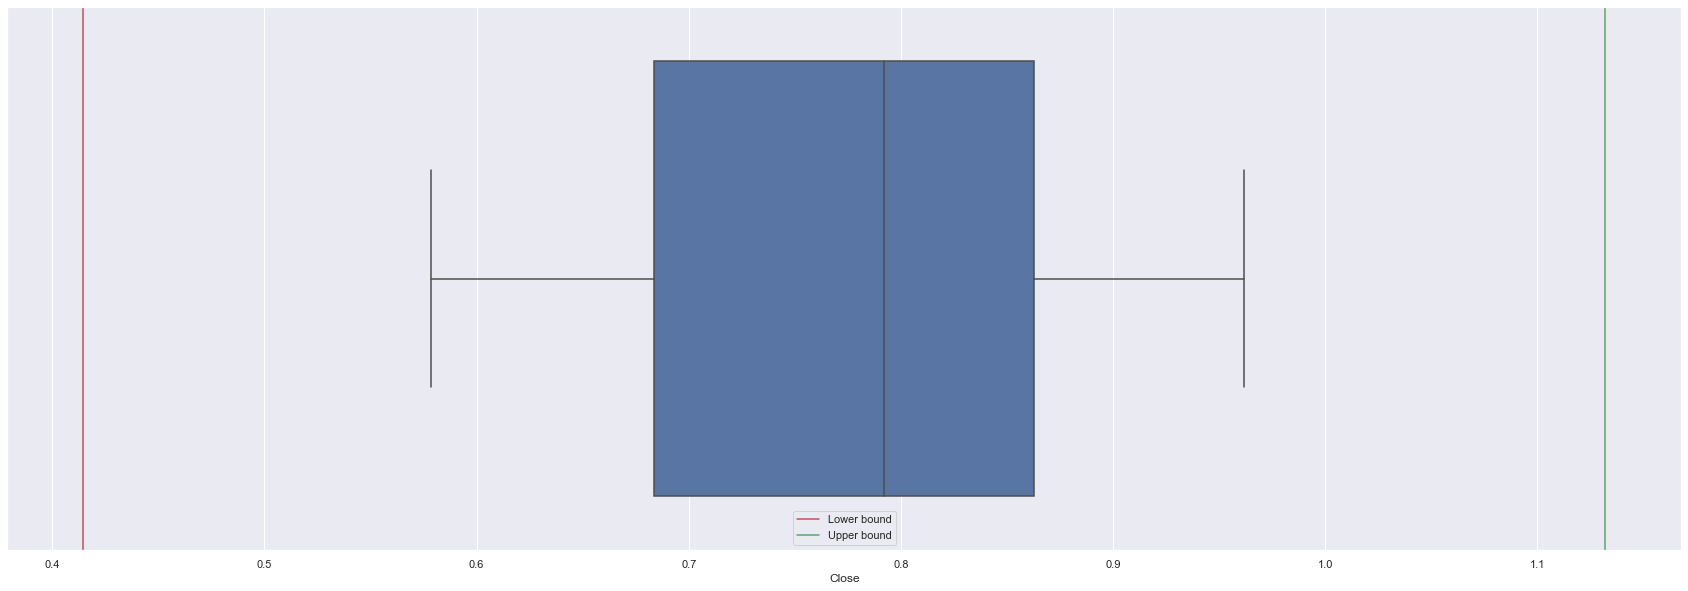

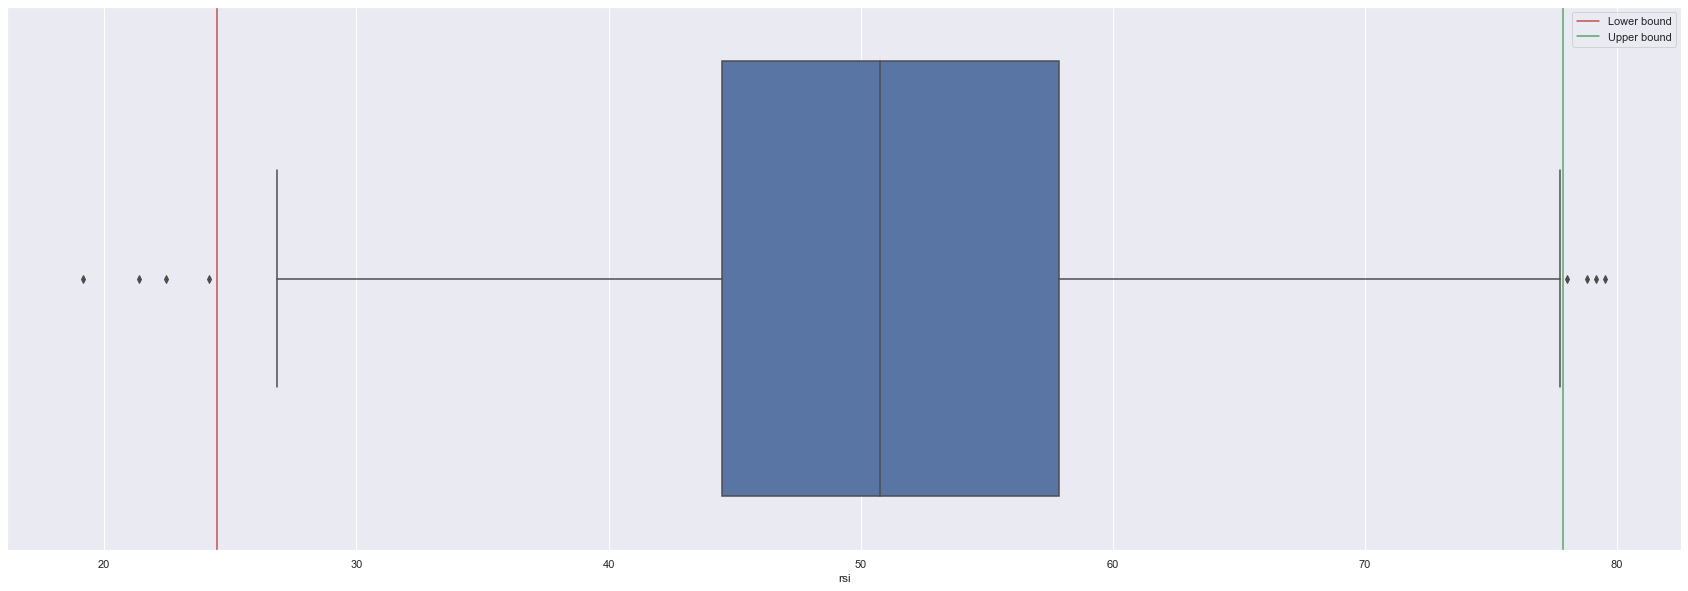

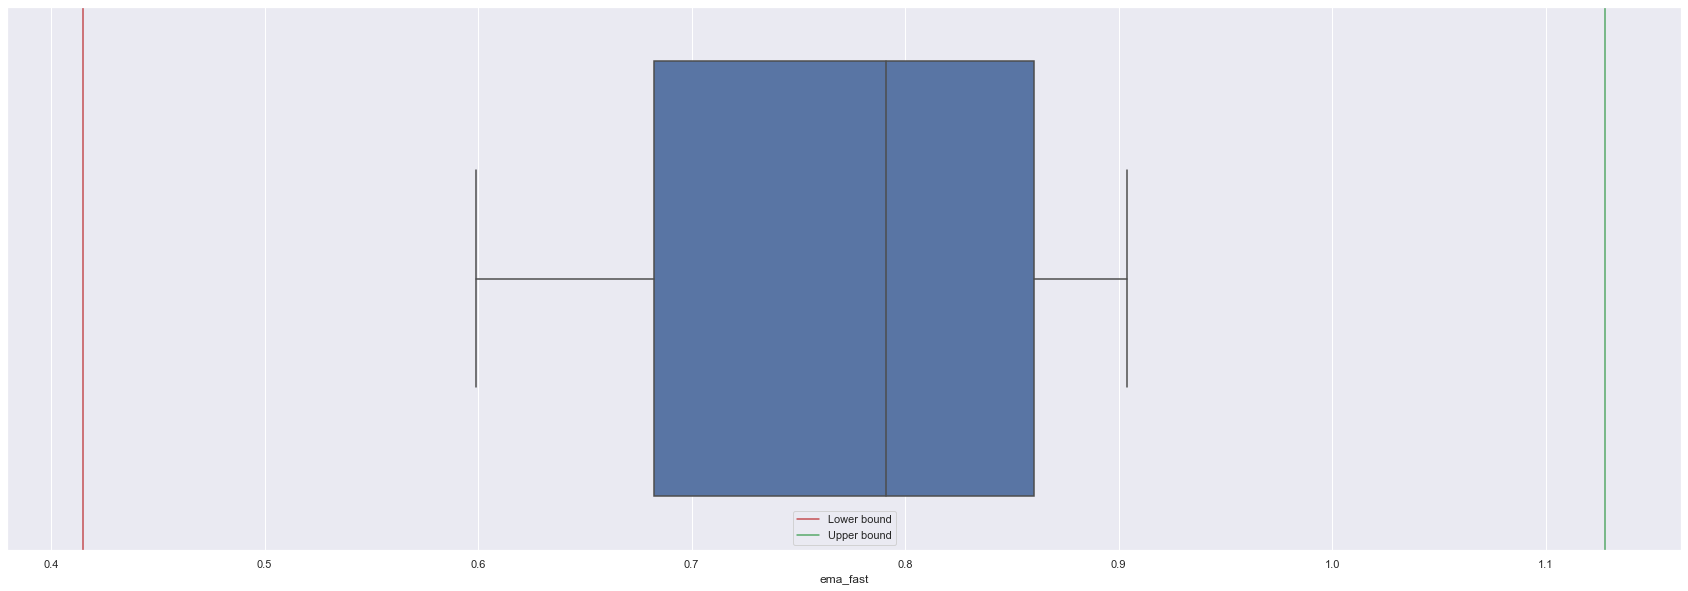

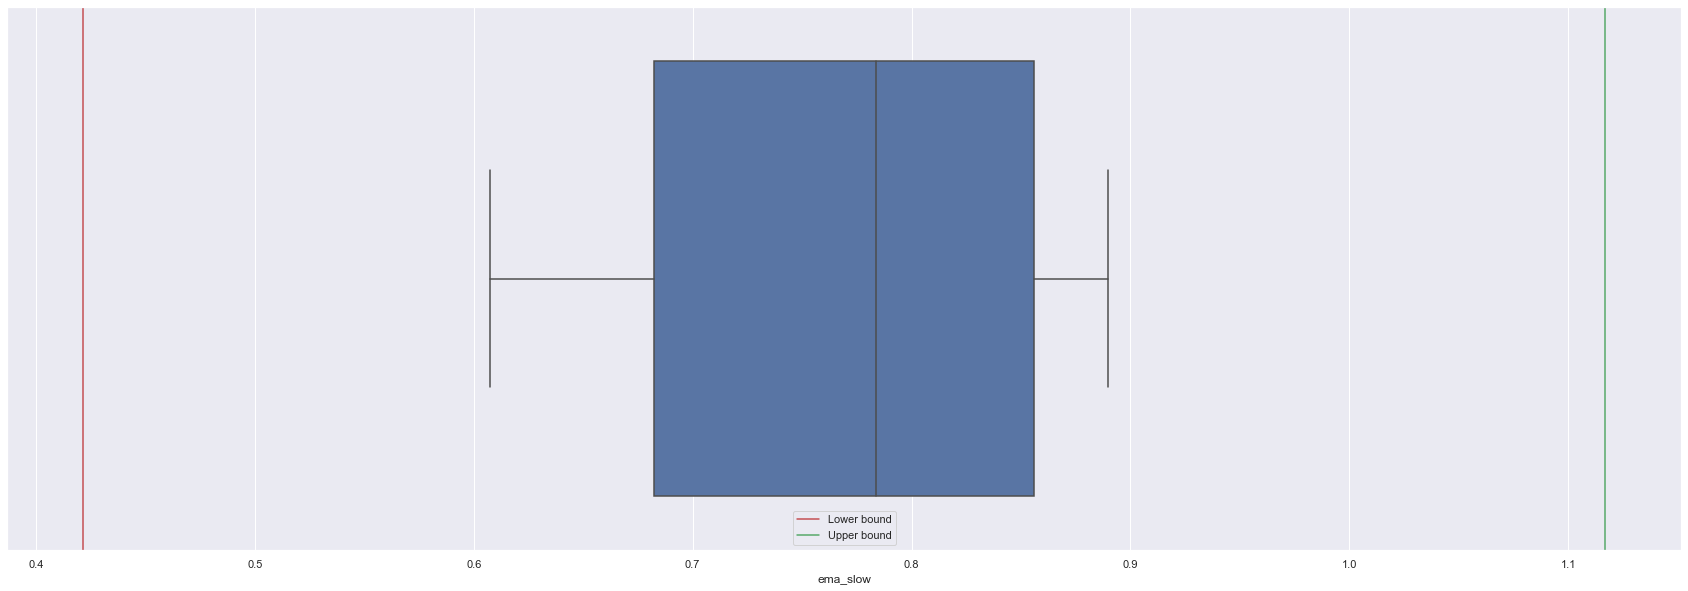

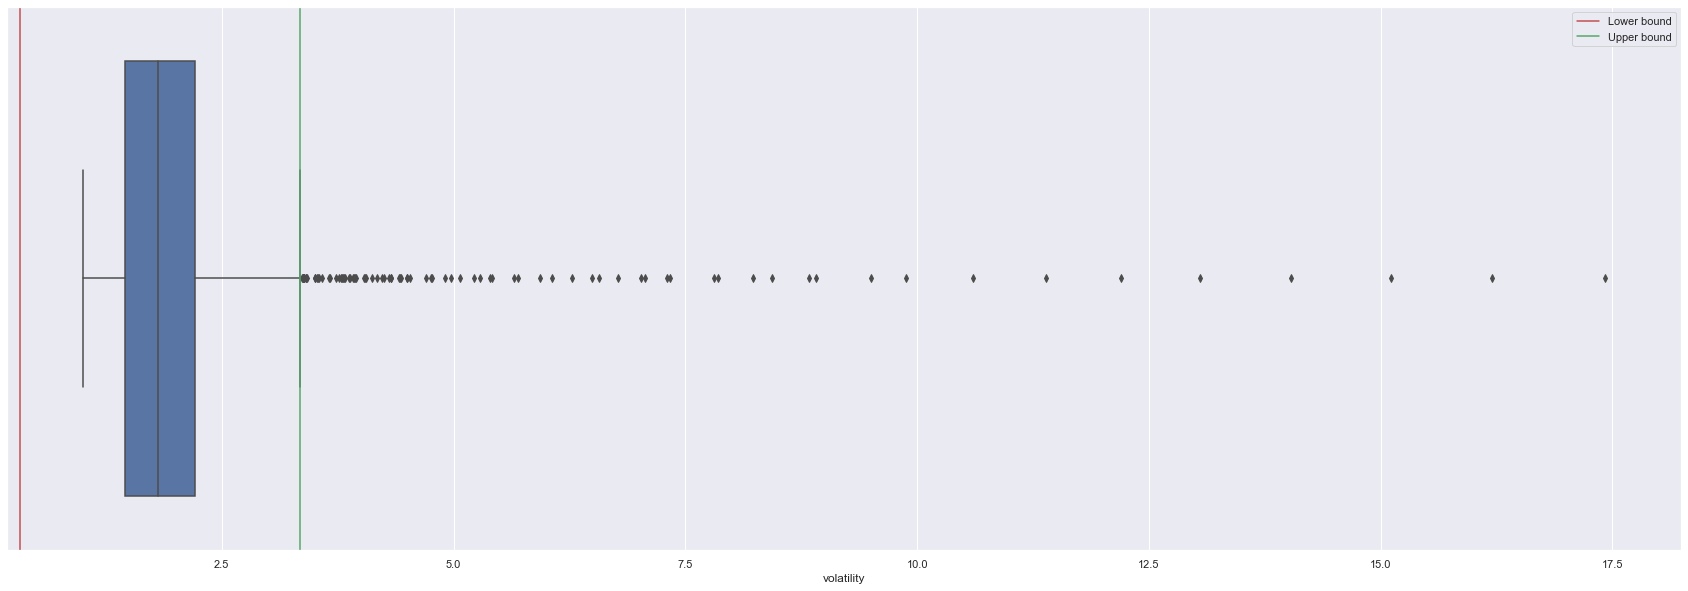

In [23]:
boxplot(data, bounds=True)

Let's check each feature's outliers. 

In [24]:
outliers_high = get_outliers(data, "High")
outliers_high

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
247,2004-09-27,0.68,2.2335,0.6781,0.6895,61.503026,0.675635,0.675357,17.421381


Some news from that day that might have affected this:

https://nypost.com/2004/09/27/buyout-deal-sets-up-lazard-for-ipo/

https://nypost.com/2004/09/27/election-2004-poll/

https://www.dailymail.co.uk/money/news/article-1506847/Bankers-start-fight-against-extradition.html

In [25]:
outliers_low = get_outliers(data, "Low")
outliers_low

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
297,2005-09-12,0.6733,0.6787,0.3375,0.6744,43.750940,0.680885,0.683147,5.411532
428,2008-03-17,0.7800,0.7908,0.0066,0.7783,73.540231,0.752443,0.722109,8.835696


https://nypost.com/2005/09/12/trump-place-flips-flap/

https://www.dailymail.co.uk/money/cardsloans/article-1593320/Young-told-to-choose-bankruptcy.html

https://www.dailymail.co.uk/money/investing/article-1593300/Market-report-Market-Close.html

https://www.dailymail.co.uk/news/article-537728/As-global-recession-looms-way-halt-slide.html

https://www.dailymail.co.uk/news/article-537591/A-heavy-price-bankers-greed.html

In [26]:
outliers_volatility = get_outliers(data, "volatility")
outliers_volatility

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
247,2004-09-27,0.6800,2.2335,0.6781,0.6895,61.503026,0.675635,0.675357,17.421381
248,2004-10-04,0.6896,0.6924,0.6863,0.6912,62.468289,0.677710,0.676094,16.200247
249,2004-10-11,0.6915,0.6923,0.6850,0.6916,62.705242,0.679562,0.676815,15.109781
250,2004-10-18,0.6916,0.6964,0.6889,0.6953,64.911975,0.681660,0.677675,14.032896
251,2004-10-25,0.6953,0.6976,0.6929,0.6965,65.622437,0.683639,0.678550,13.056296
...,...,...,...,...,...,...,...,...,...
485,2009-04-20,0.8812,0.9080,0.8796,0.9021,53.604564,0.900572,0.862788,3.658753
486,2009-04-27,0.9024,0.9052,0.8882,0.9015,53.478069,0.900695,0.864588,3.534371
487,2009-05-04,0.8889,0.8977,0.8763,0.8960,52.260644,0.900069,0.866049,3.502955
488,2009-05-11,0.8961,0.9034,0.8865,0.8891,50.701249,0.898607,0.867122,3.413758


In [27]:
outliers_rsi = get_outliers(data, "rsi")
outliers_rsi

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
174,2003-05-05,0.69950,0.71940,0.69820,0.71890,79.522395,0.685940,0.661915,1.865245
176,2003-05-19,0.71660,0.72450,0.70970,0.72300,78.796358,0.694378,0.667164,1.932540
418,2008-01-07,0.74780,0.75840,0.74200,0.75550,79.151286,0.721249,0.699653,1.811391
468,2008-12-22,0.93380,0.96220,0.93310,0.96160,78.010493,0.857887,0.809143,3.377863
785,2015-01-19,0.76350,0.77124,0.74040,0.74227,24.141774,0.778613,0.794402,1.712995
790,2015-02-23,0.73952,0.74046,0.72300,0.72430,22.447921,0.757638,0.782578,1.768750
791,2015-03-02,0.72460,0.73013,0.71813,0.72003,21.389432,0.752624,0.779669,1.771194
792,2015-03-09,0.72020,0.72182,0.70140,0.71030,19.171099,0.746981,0.776442,1.872555


https://www.cnbc.com/2015/03/09/uk-finally-finishes-paying-for-world-war-i.html

We have many outliers for the features ```rsi``` and ```volatility```, so let's see if we can merge them and filter between them to get some more "meaningful" outlier. 

In [28]:
pd.merge(outliers_volatility, outliers_rsi, on=["Date"])

,Date,Open_x,High_x,Low_x,...,rsi_y,ema_fast_y,ema_slow_y,volatility_y
0,2008-12-22,0.9338,0.9622,0.9331,...,78.010493,0.857887,0.809143,3.377863


https://www.dailymail.co.uk/news/article-1100547/Pay-passengers-flight-delays-airlines-told-judges-close-legal-loophole.html
    
https://www.dailymail.co.uk/money/article-1100498/MARKET-REPORT-Slimming-drug-fattens-shares.html

There are clearly many news that are stock related or that might have an impact on the stock and the currency exchange.

***

# **6. Correlation**<a class="anchor" id="corr"></a>

<img src="img/correlation.jpeg">

Another important step is to see the relationship between the data's features. Are they independent, or do they affect others? Correlation is tricky especially when dealing with machine learning tasks. All variables have to be influenced by others just the right amount to have something to work with, but not too much because it could esentially mean that we have duplicated data. If two variables grow at the same time and rate, why keep them both? 

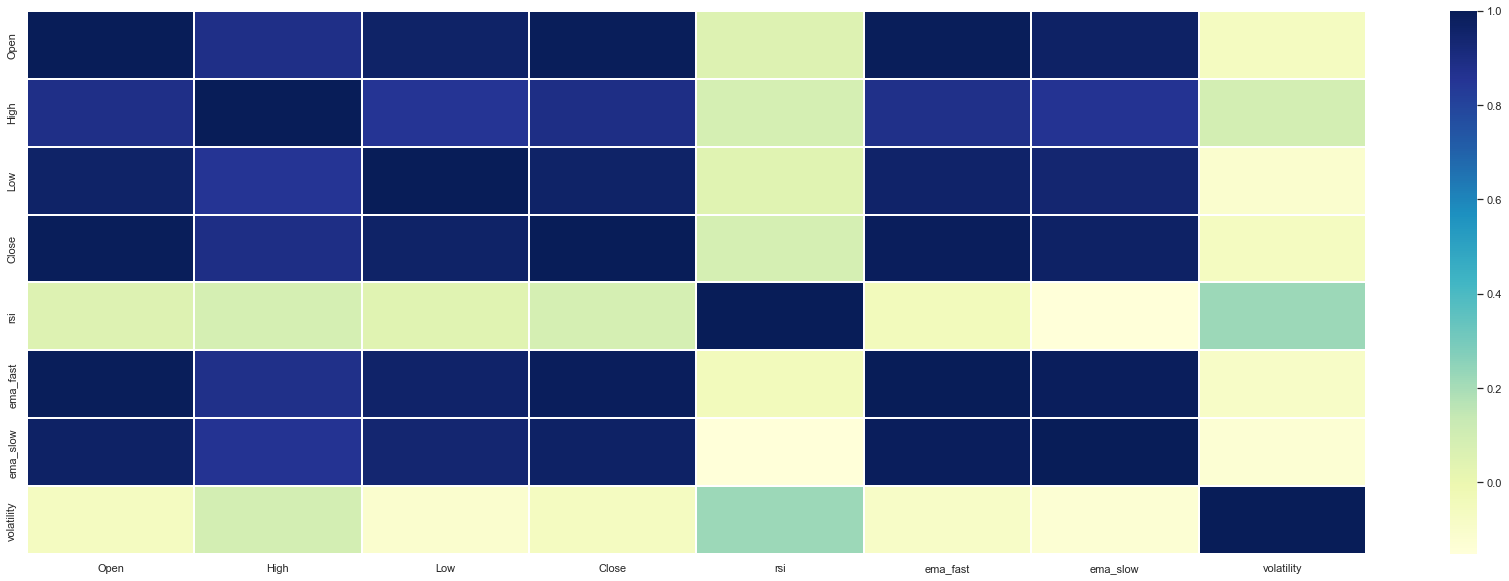

In [29]:
corrmat = data.corr()

f, ax = plt.subplots(figsize=(30, 10))

sns.heatmap(corrmat, ax=ax, cmap='YlGnBu', linewidth=0.1)

plt.savefig(f'img/figs/corrmap.png')

We can see that all variables are highly correlated with eachother, but it is expected as we are talking about stock market: everything depends on the history of the data, so it would logically reflect in high correlation values. 

However, we can see for example that ```rsi``` and ```volatility``` do not have much correlation. 

Volatility is the rate at which the price of a stock increases or decreases over a particular period. Higher stock price volatility often means higher risk and helps an investor to estimate the fluctuations that may happen in the future ([Source](https://www.fidelity.com.sg/beginners/your-guide-to-stock-investing/understanding-stock-market-volatility-and-how-it-could-help-you#:~:text=What%20is%20volatility%3F,may%20happen%20in%20the%20future.)).

The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. Traditional interpretation and usage of the RSI are that values of 70 or above indicate that a security is becoming overbought or overvalued and may be primed for a trend reversal or corrective pullback in price. An RSI reading of 30 or below indicates an oversold or undervalued condition ([Source](https://www.investopedia.com/terms/r/rsi.asp)).


<img src="img/homer.gif">

Since these stock variables are not that easy to interpret in such a short period of time, I'll let the imagination of the reader run free, and hopefully it will understand why the correlation of these two variables is low. 

On another note, there is another kind of plot that helps to get more than one visualization at a time.

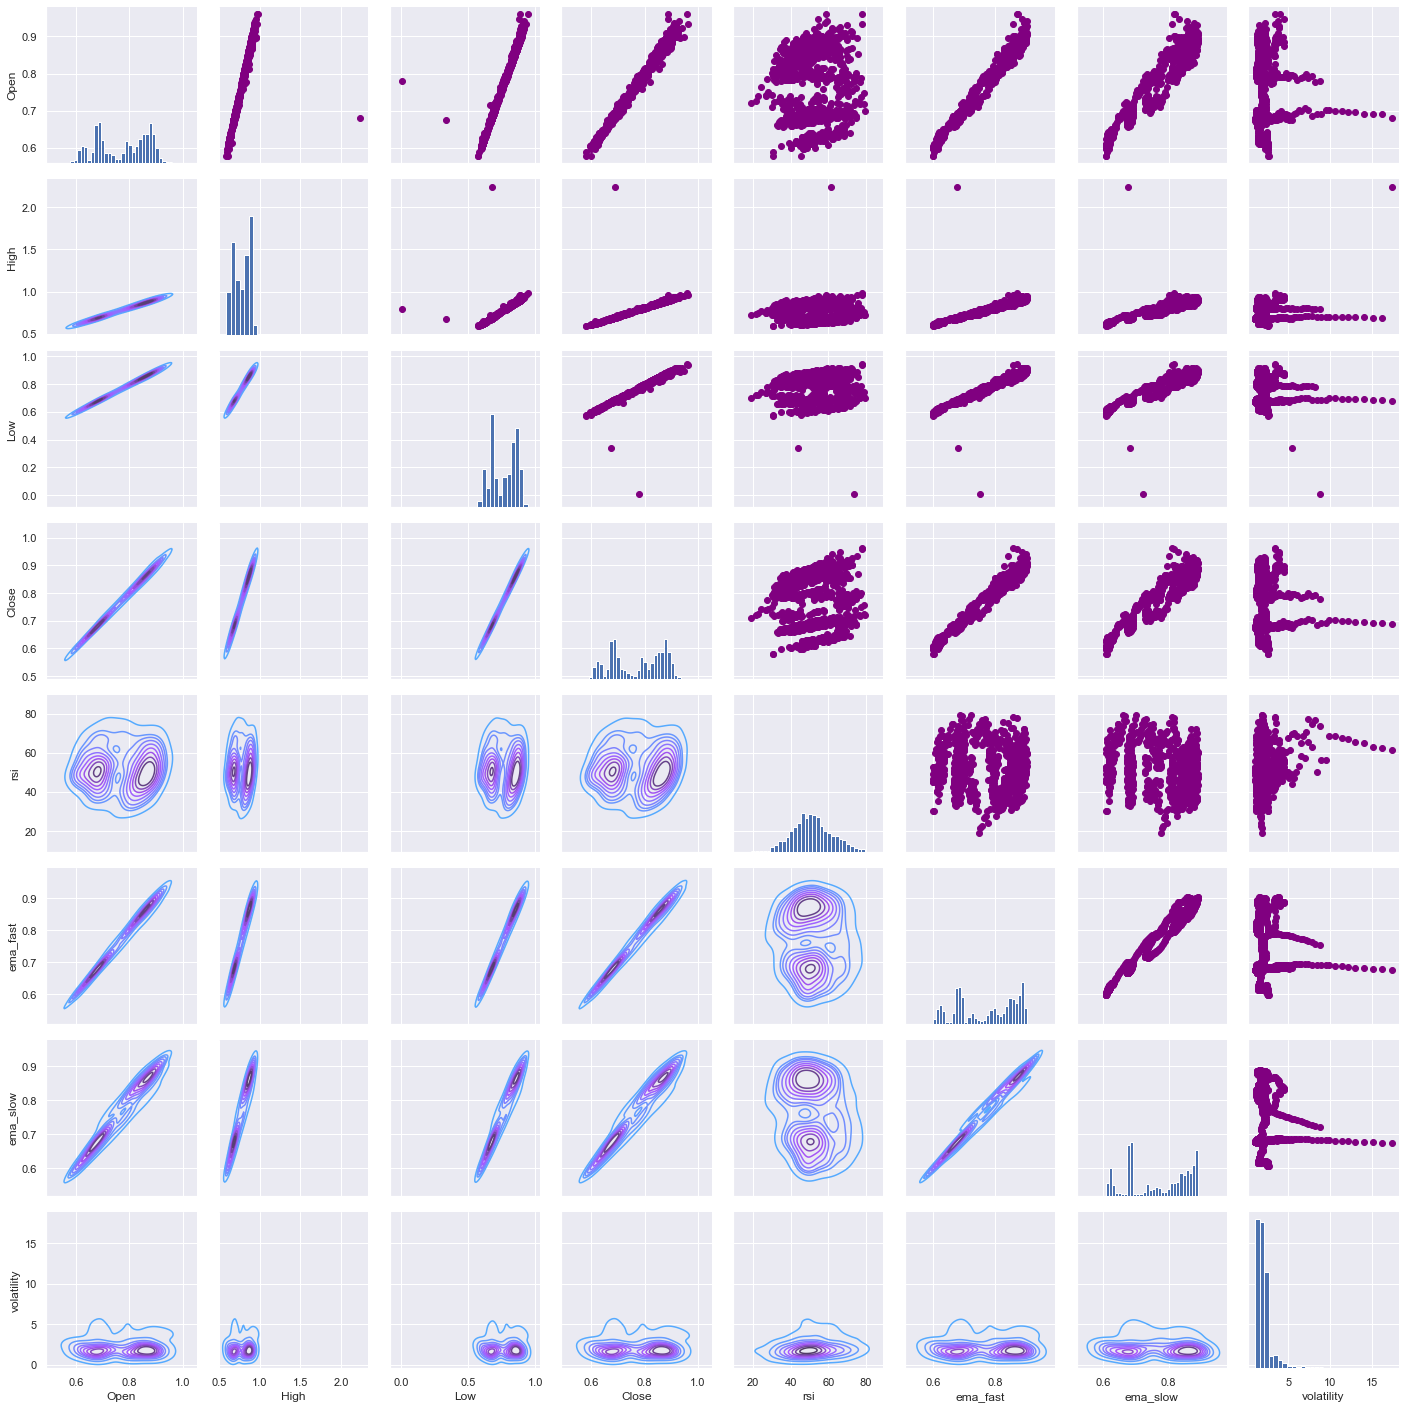

In [30]:
return_fig = sns.PairGrid(data)
return_fig.map_upper(plt.scatter, color="purple")
return_fig.map_lower(sns.kdeplot, cmap="cool_d")
return_fig.map_diag(plt.hist, bins=30)
plt.savefig(f'img/figs/pairgrid.png')

We are clearly able to see the density of the distributions, the peaks, the outliers in the different features, etc. This kind of graph is perfect for wrapping up this section and taking one last look at the distribution of our data!

***

# **7. Visualizations**<a class="anchor" id="visu"></a>

To finish this EDA, we will be looking into more *stock-like* visualizations, and get a feeling for the trends in the data.  

### *7.0.1 Library imports*

In [31]:
import plotly.graph_objects as go
from plotly.offline import plot

### *7.0.2 Function definitions*

In [32]:
import time

def plot_with_dates(data, features, dates, date_formatter, date_locator, title, figsize=(40, 10), labels=None):
    '''
    Plots the data showing the dates on the x-axis. 
    :param data: dataframe containing the data to visualize.
    :param features: list of features to plot. 
    :param dates: list of dates. 
    :param date_formatter: object used to format the dates for their visualization. 
    :param date_locator: object used to locate the ticks in the x-axis for each date. 
    :param title: title of the plot. 
    :param figsize: dimenions of the plot. Default to (40, 10).
    :param labels: labels used for each element visualized in the plot. If no labels are provided, the feature names will be used.  
    '''
    fig, ax = plt.subplots(figsize=figsize)
    # If user provided labels, use them
    if labels:
        # Initialize index label
        idx_label = 0
        # For all the features provided
        for feature in features:
            # Plot the data
            ax.plot(dates, data[feature], linewidth = 1.5, label = labels[idx_label])
            # Increment the index to access the next label 
            idx_label += 1
    else:
        # Plot the data using the provided feature as label
        for feature in features:
            ax.plot(dates, data[feature], linewidth = 1.5, label = feature)
    
    # Set the format and x-ticks. 
    ax.xaxis.set_major_formatter(date_formatter)
    ax.xaxis.set_major_locator(date_locator)
    # Set the title of the plot. 
    ax.set_title(title)
    # Show the legend. 
    plt.legend()
    plt.savefig(f'img/figs/dateplot_{time.strftime("%H:%M:%S", time.localtime())}.png')
    # Show the plot. 
    plt.show()

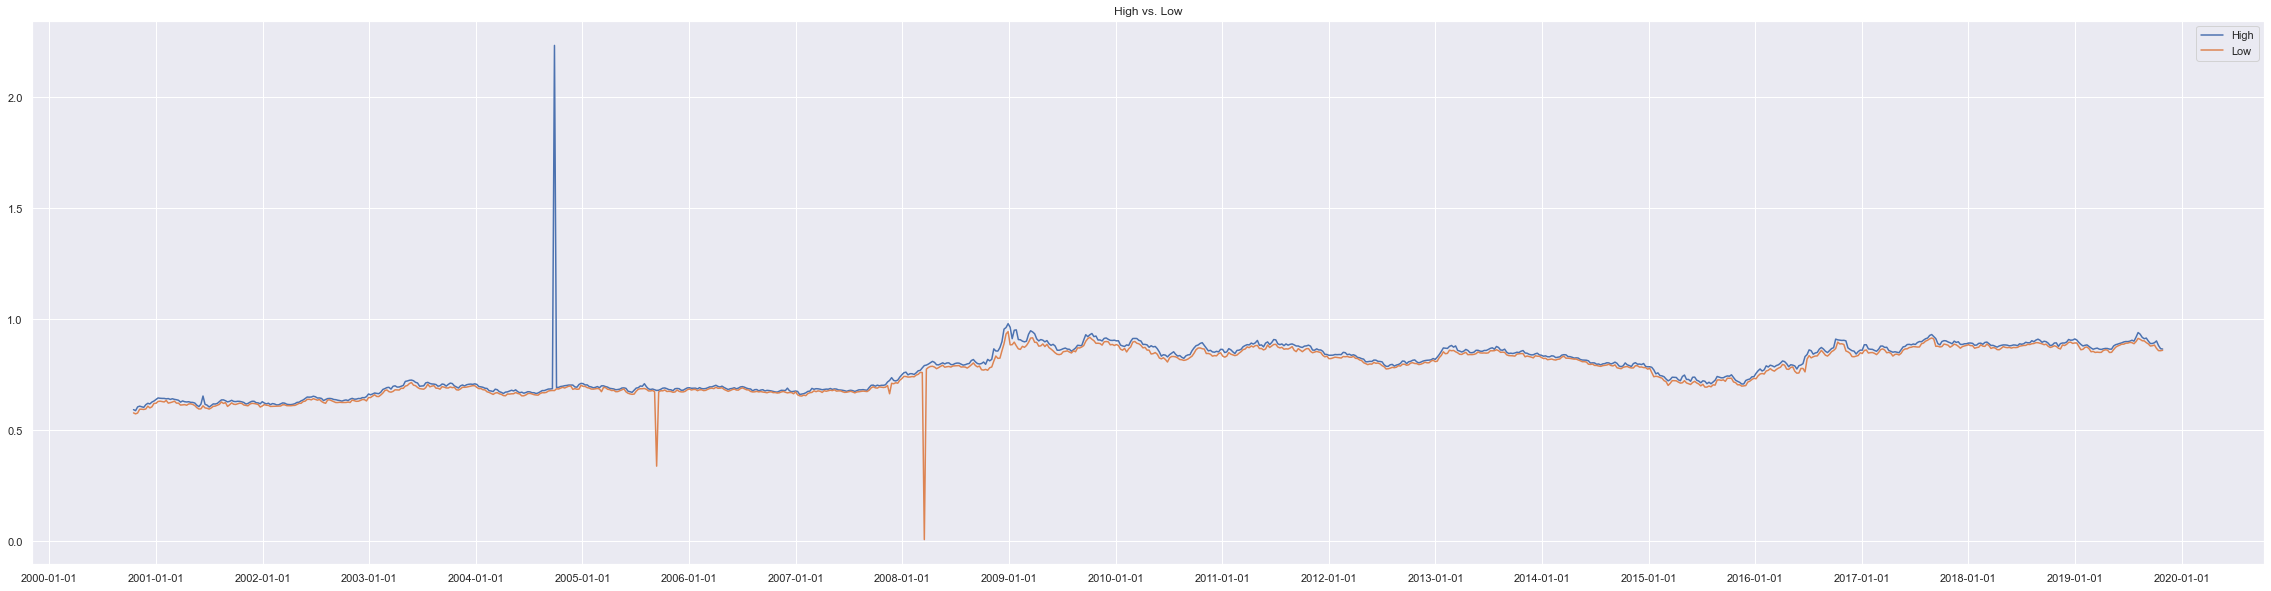

In [33]:
import datetime
import matplotlib.dates as mdates

date_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in data["Date"]]
date_formatter = mdates.DateFormatter("%Y-%m-%d")
date_locator = mdates.YearLocator()


plot_with_dates(data, ["High", "Low"], date_values, date_formatter, date_locator, 'High vs. Low')

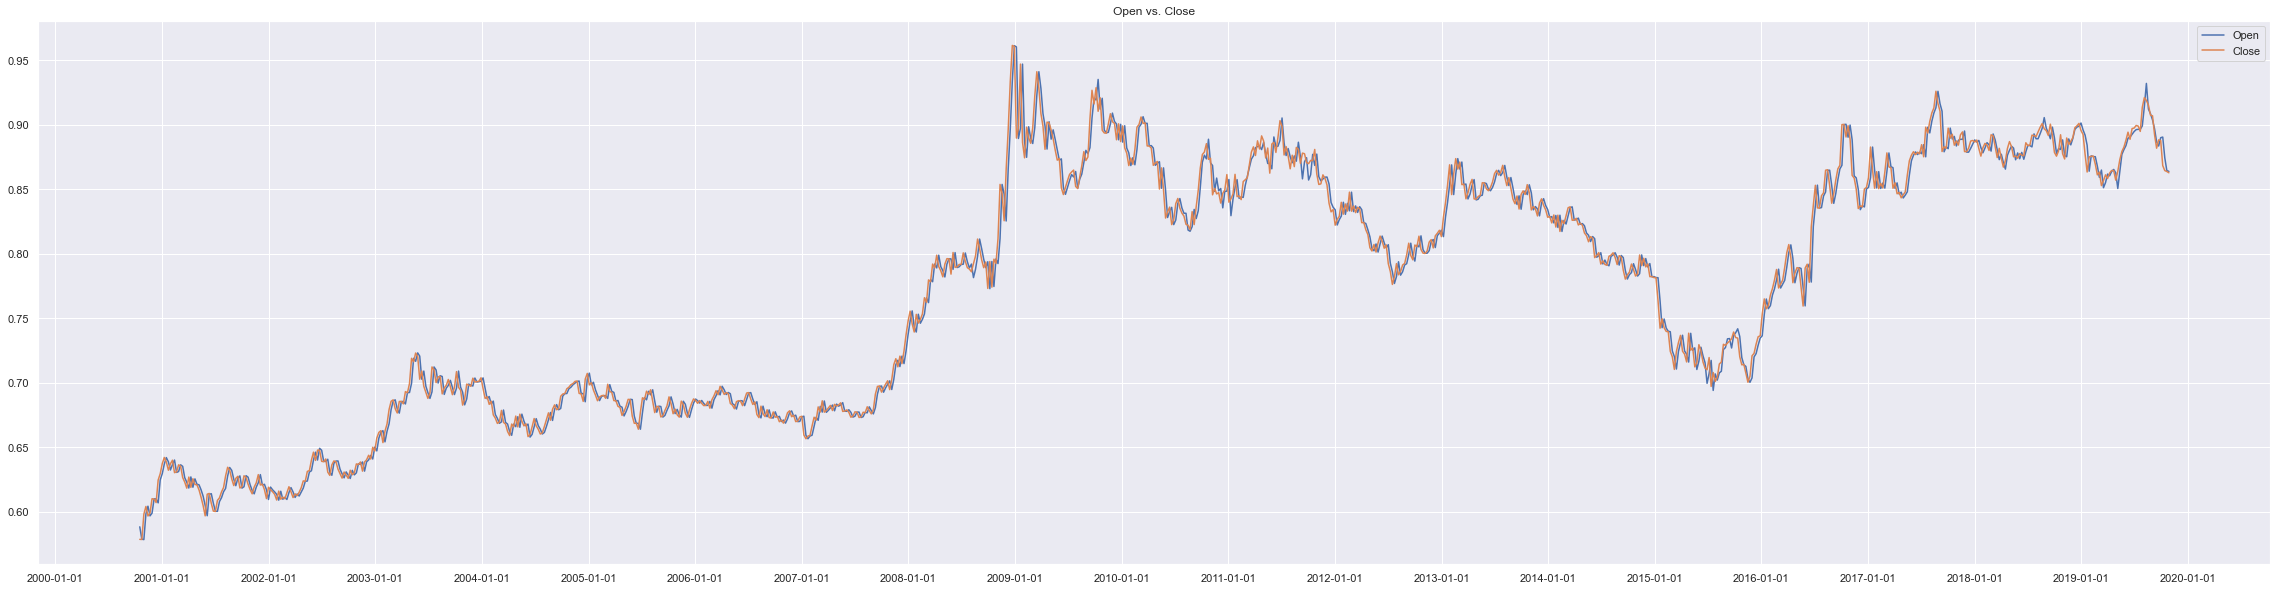

In [34]:
plot_with_dates(data, ["Open", "Close"], date_values, date_formatter, date_locator, 'Open vs. Close')

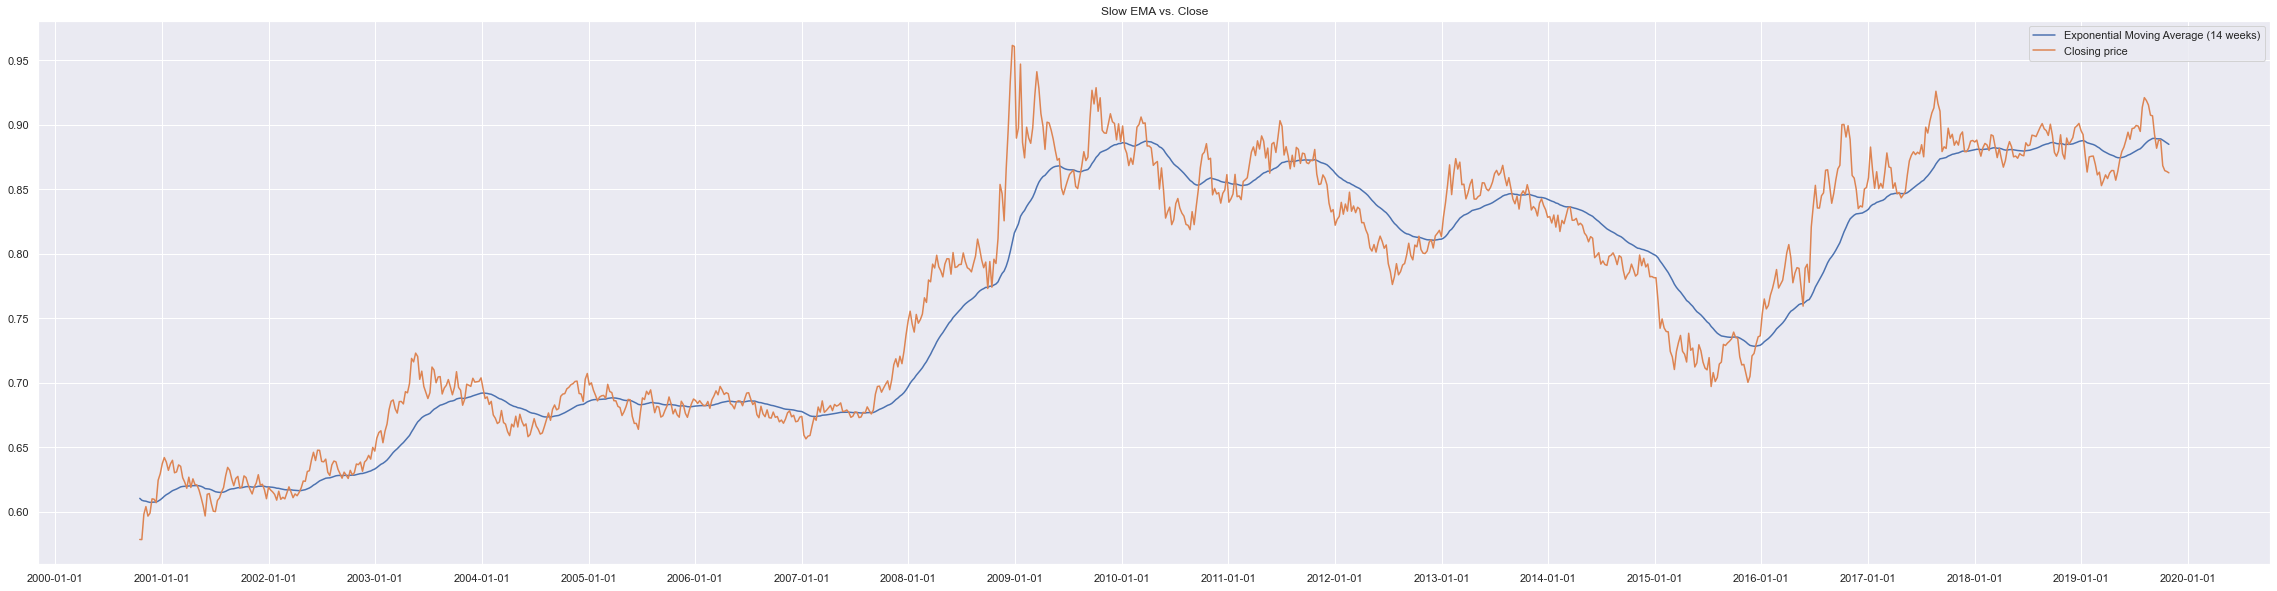

In [35]:
plot_with_dates(data, ["ema_slow", "Close"], date_values, date_formatter, date_locator, 'Slow EMA vs. Close', labels=["Exponential Moving Average (14 weeks)", "Closing price"])

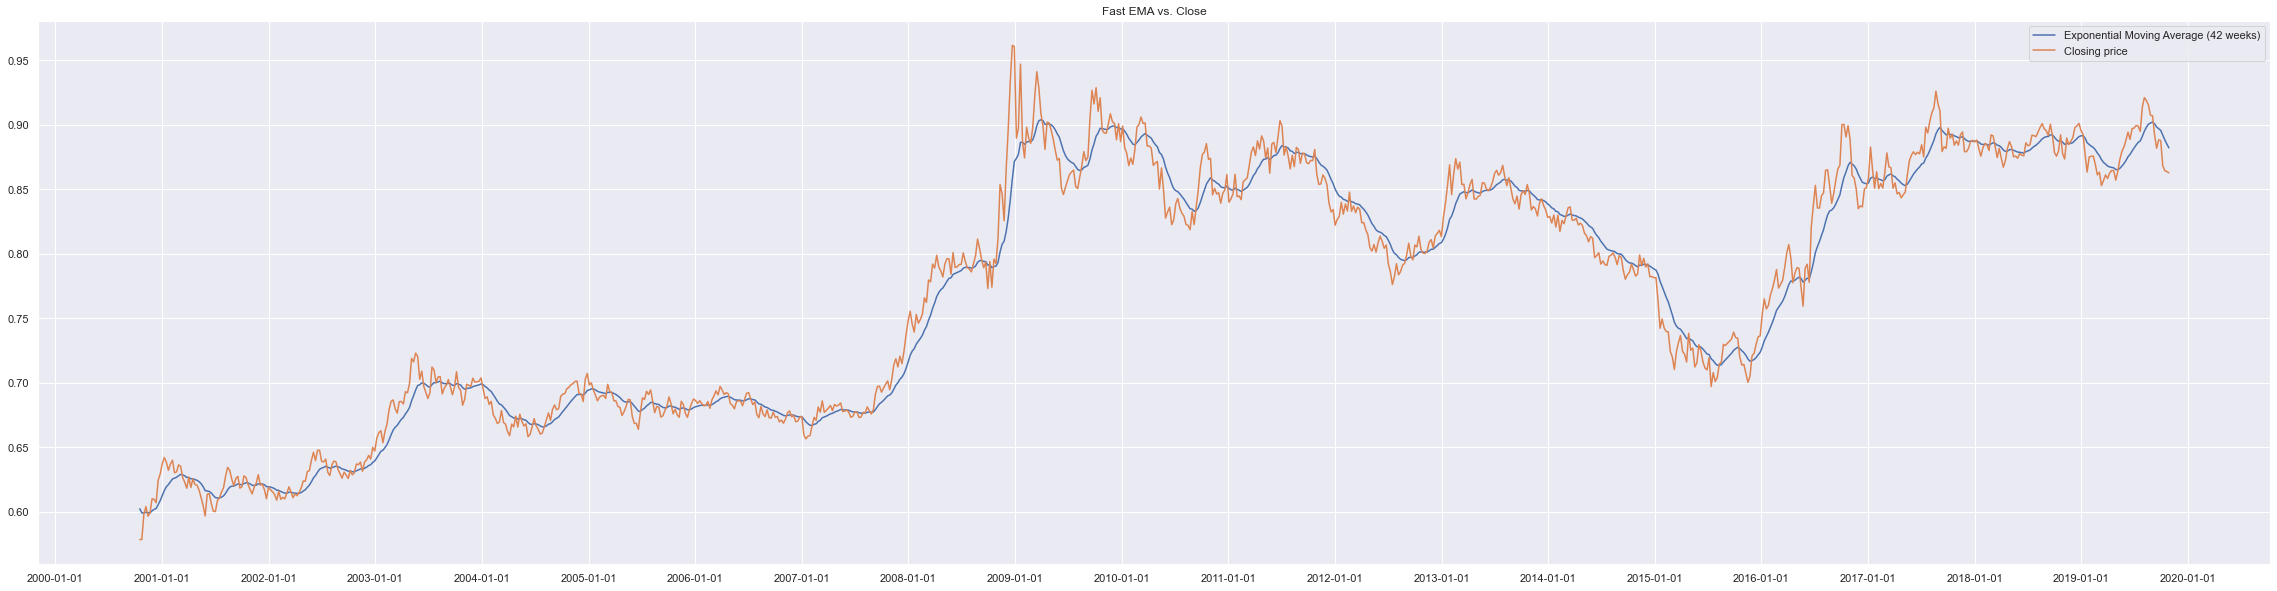

In [36]:
plot_with_dates(data, ["ema_fast", "Close"], date_values, date_formatter, date_locator, 'Fast EMA vs. Close', labels=["Exponential Moving Average (42 weeks)", "Closing price"])

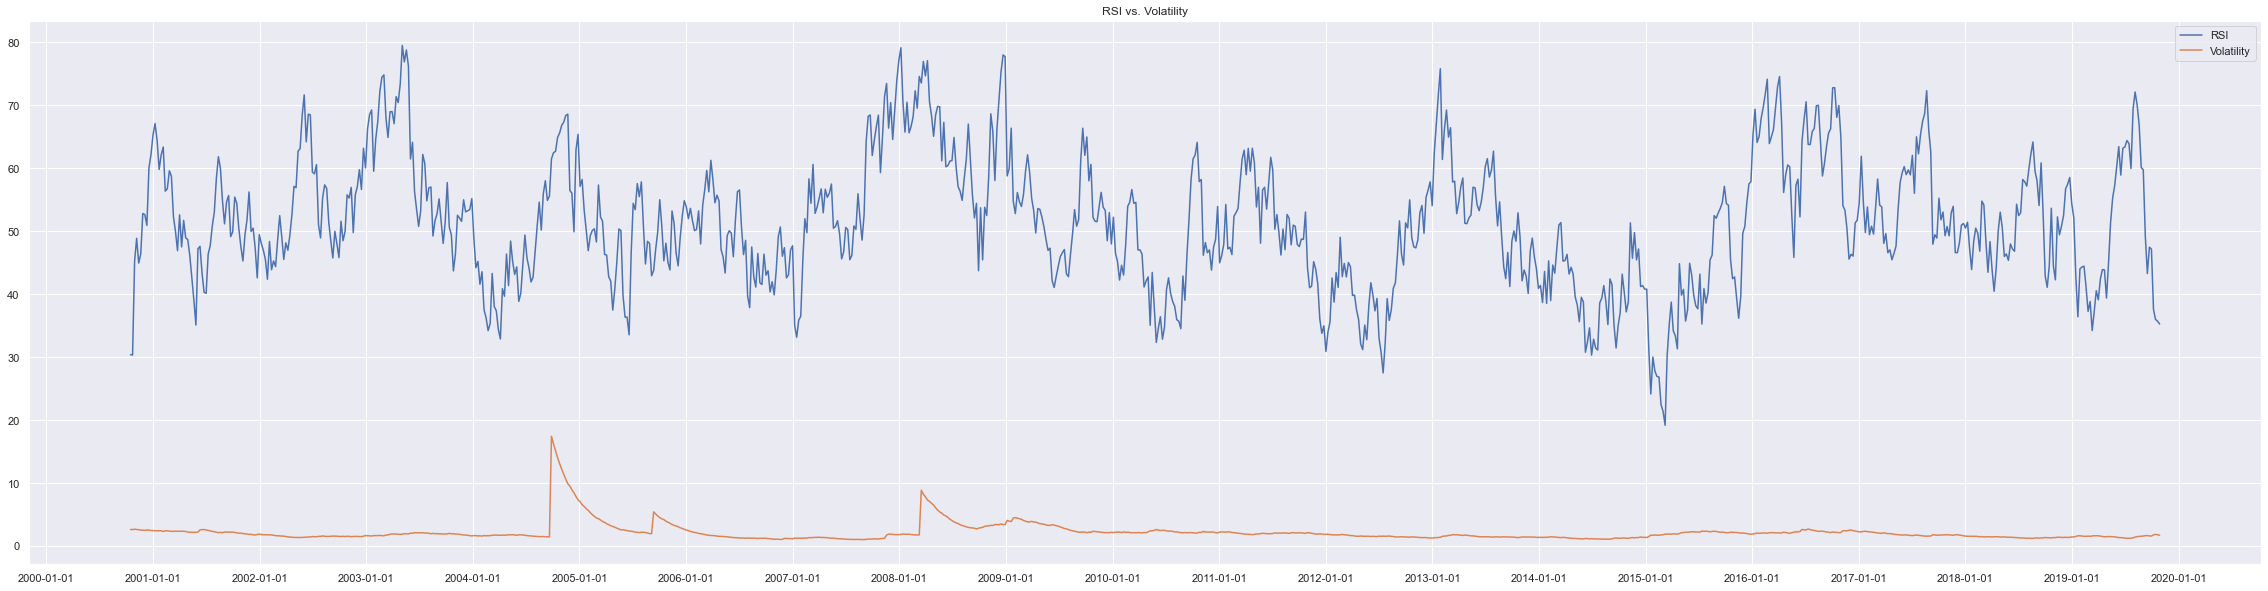

In [37]:
plot_with_dates(data, ["rsi", "volatility"], date_values, date_formatter, date_locator, 'RSI vs. Volatility', labels=["RSI", "Volatility"])

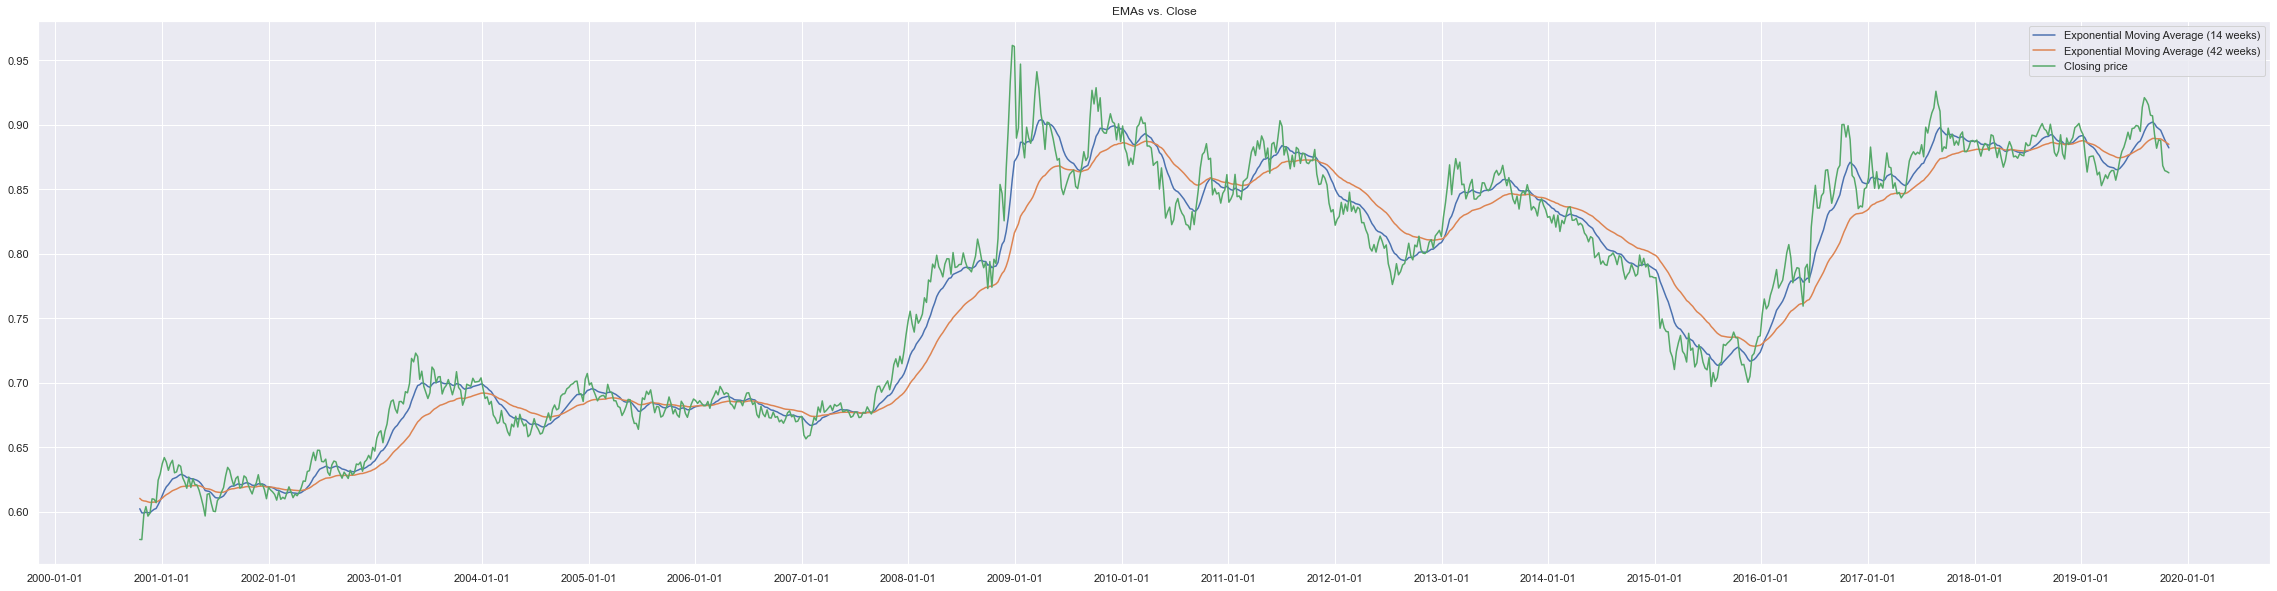

In [38]:
plot_with_dates(data, ["ema_fast", "ema_slow", "Close"], date_values, date_formatter, date_locator, 'EMAs vs. Close', labels=["Exponential Moving Average (14 weeks)", "Exponential Moving Average (42 weeks)", "Closing price"])

We can detect a trend in the currency pairs. Over the last 20 years it has grown and it went from below 0.6 to fluctuating between 0.85 and 0.95. There is a slight drop in 2016 and it could have been most likely triggered by the Referendum held to discuss the Brexit ([Source](https://en.wikipedia.org/wiki/2016_United_Kingdom_European_Union_membership_referendum)). 

To finish, we can also take a more interactive loook at the data using the candlestick plot. 

In [39]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
plot(fig)

'temp-plot.html'

The following GIF is an example of how to interact with the plot:

<img src="img/plotly_example.gif"/>